In [1]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# Ï∞®Ïõê Ï∂ïÏÜå
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Íµ∞Ïßë
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

# Ìè¥ÎçîÏóê Îì§Ïñ¥ÏûàÎäî ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
import glob
import os

## üì§ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò®Îã§.

In [3]:
# Î™®Îì† parquet ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_list = glob.glob("C:/Users/user/Desktop/workspace/14_Final_PROJECT/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/*.parquet")

df_all = pd.DataFrame()

for file in file_list:
    temp = pd.read_parquet(file)
    df_all = pd.concat([df_all, temp], ignore_index=True)


def resumetable(df):
  print(f'Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: {df.shape}')                                # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ï†ÑÏ≤¥ ÌÅ¨Í∏∞(Ìñâ, Ïó¥) Ï∂úÎ†•

  summary = pd.DataFrame(df.dtypes, columns=['Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ'])         # Í∞Å ÌîºÏ≤òÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Í∞ÄÏ†∏ÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏÉùÏÑ±
  summary = summary.reset_index()                                   # Ïù∏Îç±Ïä§Î•º Ï¥àÍ∏∞ÌôîÌïòÏó¨ Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôò
  summary = summary.rename(columns={'index':'ÌîºÏ≤ò'})                 # 'index' Ïª¨ÎüºÎ™ÖÏùÑ 'ÌîºÏ≤ò'Î°ú Î≥ÄÍ≤Ω

  summary['Í≤∞Ï∏°Í∞í Í∞úÏàò'] = df.isnull().sum().values                 # Í∞Å ÌîºÏ≤òÏùò Í≤∞Ï∏°Í∞í(null) Í∞úÏàò Í≥ÑÏÇ∞
  summary['Í≥†Ïú†Í∞í Í∞úÏàò'] = df.nunique().values                      # Í∞Å ÌîºÏ≤òÏùò Í≥†Ïú†Í∞í Í∞úÏàò Í≥ÑÏÇ∞

  numeric_cols = df.select_dtypes(include=['number']).columns
  summary['ÏµúÏÜå Í∞í'] = df[numeric_cols].min().reindex(summary['ÌîºÏ≤ò']).values
  summary['ÏµúÎåÄ Í∞í'] = df[numeric_cols].max().reindex(summary['ÌîºÏ≤ò']).values  

  summary['Ï≤´ Î≤àÏß∏ Í∞í'] = df.loc[0].values                          # Í∞Å ÌîºÏ≤òÏùò Ï≤´ Î≤àÏß∏ ÏÉòÌîå Í∞í
  summary['Îëê Î≤àÏß∏ Í∞í'] = df.loc[1].values                          # Í∞Å ÌîºÏ≤òÏùò Îëê Î≤àÏß∏ ÏÉòÌîå Í∞í
  summary['ÏÑ∏ Î≤àÏß∏ Í∞í'] = df.loc[2].values                          # Í∞Å ÌîºÏ≤òÏùò ÏÑ∏ Î≤àÏß∏ ÏÉòÌîå Í∞í

  # middle_index = len(df) // 2                             
  # summary['Ï§ëÍ∞Ñ Í∞í'] = df.loc[middle_index].values                  # Í∞Å ÌîºÏ≤òÏùò Ï§ëÍ∞Ñ ÏÉòÌîå Í∞í
    
  last_index = len(df)-1                              
  summary['ÎÅù Í∞í'] = df.loc[last_index].values                      # Í∞Å ÌîºÏ≤òÏùò ÎÅù ÏÉòÌîå Í∞í


  # Î™ÖÏÑ∏ÏÑú ÏùΩÏñ¥Ïò§Í∏∞ 
  desc_df = pd.read_excel("C:/Users/user/Desktop/workspace/14_Final_PROJECT/open/Ïã†Ïö©Ïπ¥Îìú_Í≥†Í∞ù_ÏÑ∏Í∑∏Î®ºÌä∏_Î∂ÑÎ•ò_AI_Í≤ΩÏßÑÎåÄÌöå_Îç∞Ïù¥ÌÑ∞_Î™ÖÏÑ∏.xlsx")
  # Î™ÖÏÑ∏ÏÑúÏóêÏÑú no Ïª¨Îüº Ï†úÍ±∞
  desc_df.drop(columns=['No'], inplace=True)
  # Î™ÖÏÑ∏ÏÑú Ìï©Í∏∞Í∏∞
  summary = pd.merge(summary, desc_df, how='left', left_on='ÌîºÏ≤ò', right_on='Ïª¨ÎüºÎ™Ö')
  summary.drop(columns=['Ïª¨ÎüºÎ™Ö'], inplace=True)
  cols = summary.columns.tolist()
  cols.insert(1, cols.pop(cols.index('ÏÑ§Î™Ö')))
  summary = summary[cols]

  return summary                                                     # ÏöîÏïΩ ÌÖåÏù¥Î∏î Î∞òÌôò


# ÏÉùÎûµ ÏóÜÏù¥ Ïó¥/Ìñâ Î™®Îëê Î≥¥Í∏∞ ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)  # Ïó¥(Column) Ï†ÑÏ≤¥ Ï∂úÎ†•
pd.set_option('display.max_rows', None)     # Ìñâ(Row) Ï†ÑÏ≤¥ Ï∂úÎ†•


resumetable(df_all)

Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: (2400000, 78)


ÌîºÏ≤ò                                                 ÏÑ§Î™Ö  \
0                 Í∏∞Ï§ÄÎÖÑÏõî                                           Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÎÖÑÏõî   
1                   ID                                              Í≥†Ïú† ID   
2               ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú                                           ÎÇ®ÎÖÄ Íµ¨Î∂Ñ ÏΩîÎìú   
3                   Ïó∞Î†π                                                 ÎÇòÏù¥   
4              Segment                                                NaN   
5            ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•           Î∂ÑÏã§/Ïó∞Ï≤¥/ÌïúÎèÑ ÏÜåÏßÑ Îì±ÏúºÎ°ú Black ListÎ°ú Îì±Ïû¨ ÎêòÏßÄ ÏïäÏùÄ ÌöåÏõê    
6         ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_CA  Î∂ÑÏã§/Ïó∞Ï≤¥/ÌïúÎèÑ ÏÜåÏßÑ Îì±ÏúºÎ°ú Black ListÎ°ú Îì±Ïû¨ ÎêòÏßÄ ÏïäÏïÑ ÌòÑÍ∏àÏÑúÎπÑÏä§ \nÏù¥...   
7        ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_Ïπ¥ÎìúÎ°†  Î∂ÑÏã§/Ïó∞Ï≤¥/ÌïúÎèÑ ÏÜåÏßÑ Îì±ÏúºÎ°ú Black ListÎ°ú Îì±Ïû¨ ÎêòÏßÄ ÏïäÏïÑ Ïπ¥ÎìúÏû•Í∏∞ÎåÄÏ∂ú\n(...   
8              ÏÜåÏßÄÏó¨Î∂Ä_Ïã†Ïö©                                       Ïã†Ïö©Ïπ¥ÎìúÎ•º ÏÜåÏßÄÌïú ÌöåÏõê   
9          ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïú†Ìö®_Ïã†Ïö©                                     Ïú†Ìö®Ìïú Ïã†Ïö©Ïπ¥ÎìúÏùò Î≥¥Ïú† Ïàò   
10       ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïù¥Ïö©Í∞ÄÎä•_Ïã†Ïö©               Ïú†Ìö®Ìïú Ïã†Ïö©Ïπ¥Îìú Ï§ë BLÎ°ú Îì±Ïû¨ÎêòÏßÄ ÏïäÏïÑ Ïù¥Ïö© Í∞ÄÎä•Ìïú Ïã†Ïö©Ïπ¥Îìú Ïàò   
11             ÏûÖÌöåÏùºÏûê_Ïã†Ïö©      Ïπ¥ÎìúÌöåÏõêÏù¥ Îêú ÏùºÏûê (ÏûÖÌöåÏùºÏûêÏùò ÏùºÎã®ÏúÑ ÎëêÏûêÎ¶¨Îäî 01Î°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÏõîÎã®ÏúÑÎ°ú Î≤îÏ£ºÌôî)   
12          ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©                               Ïã†Ïö©Ïπ¥ÎìúÎ•º ÏÜåÏßÄÌïú Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò   
13             ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥                                               Ïó∞Ï≤¥Ïó¨Î∂Ä   
14          Ïù¥Ïö©Í±∞Ï†àÏó¨Î∂Ä_Ïπ¥ÎìúÎ°†                                         Ïπ¥ÎìúÎ°† Ïù¥Ïö©Í±∞Ï†àÏó¨Î∂Ä   
15         ÎèôÏùòÏó¨Î∂Ä_ÌïúÎèÑÏ¶ùÏï°ÏïàÎÇ¥                                        ÌïúÎèÑÏ¶ùÏï°ÏïàÎÇ¥ ÎèôÏùòÏó¨Î∂Ä   
16           ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM                                          TM ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä   
17           ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_DM                                          DM ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä   
18           ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_Î©îÏùº                                          Î©îÏùº ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä   
19          ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_SMS                                         SMS ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä   
20            Í∞ÄÏûÖÌÜµÏã†ÌöåÏÇ¨ÏΩîÎìú                                      Í∞ÄÏûÖÌïú ÌÜµÏã†ÏÇ¨ Íµ¨Î∂Ñ ÏΩîÎìú   
21             ÌÉàÌöåÌöüÏàò_ÎàÑÏ†Å                                            ÎàÑÏ†Å ÌÉàÌöåÌöüÏàò   
22            ÏµúÏ¢ÖÌÉàÌöåÌõÑÍ≤ΩÍ≥ºÏõî                                    ÏµúÏ¢ÖÌÉàÌöå Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò   
23        ÌÉàÌöåÌöüÏàò_Î∞úÍ∏â6Í∞úÏõîÏù¥ÎÇ¥                                     Î∞úÍ∏â6Í∞úÏõî Ïù¥ÎÇ¥ ÌÉàÌöå ÌöüÏàò   
24         ÌÉàÌöåÌöüÏàò_Î∞úÍ∏â1ÎÖÑÏù¥ÎÇ¥                                      Î∞úÍ∏â1ÎÖÑ Ïù¥ÎÇ¥ ÌÉàÌöå ÌöüÏàò   
25               Í±∞Ï£ºÏãúÎèÑÎ™Ö  17Í∞ú Í¥ëÏó≠ÏãúÎèÑÎ™Ö\n(ÏÑúÏö∏, Î∂ÄÏÇ∞, ÎåÄÍµ¨, Ïù∏Ï≤ú, Í¥ëÏ£º, ÎåÄÏ†Ñ, Ïö∏ÏÇ∞, ÏÑ∏Ï¢Ö, Í≤ΩÍ∏∞...   
26               ÏßÅÏû•ÏãúÎèÑÎ™Ö  17Í∞ú Í¥ëÏó≠ÏãúÎèÑÎ™Ö\n(ÏÑúÏö∏, Î∂ÄÏÇ∞, ÎåÄÍµ¨, Ïù∏Ï≤ú, Í¥ëÏ£º, ÎåÄÏ†Ñ, Ïö∏ÏÇ∞, ÏÑ∏Ï¢Ö, Í≤ΩÍ∏∞...   
27             ÎßàÏºÄÌåÖÎèôÏùòÏó¨Î∂Ä                                          ÎßàÏºÄÌåÖ ÎèôÏùò Ïó¨Î∂Ä   
28          Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨                                     Ïú†Ìö®Ìïú Ïπ¥ÎìúÏàò (Ïã†Ïö©Ï≤¥ÌÅ¨)   
29            Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©                                       Ïú†Ìö®Ìïú Ïπ¥ÎìúÏàò (Ïã†Ïö©)   
30         Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±                                    Ïú†Ìö®Ìïú Ïπ¥ÎìúÏàò (Ïã†Ïö©_Í∞ÄÏ°±)   
31            Ïú†Ìö®Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨                                       Ïú†Ìö®Ìïú Ïπ¥ÎìúÏàò (Ï≤¥ÌÅ¨)   
32         Ïú†Ìö®Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨_Í∞ÄÏ°±                                    Ïú†Ìö®Ìïú Ïπ¥ÎìúÏàò (Ï≤¥ÌÅ¨_Í∞ÄÏ°±)   
33        Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨                                  Ïù¥Ïö© Í∞ÄÎä•Ìïú Ïπ¥ÎìúÏàò (Ïã†Ïö©Ï≤¥ÌÅ¨)   
34          Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©                       

## ‚úÖ Í∏∞Î≥∏ Î∂ÑÌè¨ Î∞è Ïù¥ÏÉÅÏπò ÌôïÏù∏

### Segment Î∂ÑÌè¨ ÌôïÏù∏ (ÌÉÄÍ≤ü Í∞í ÎπÑÏú®)

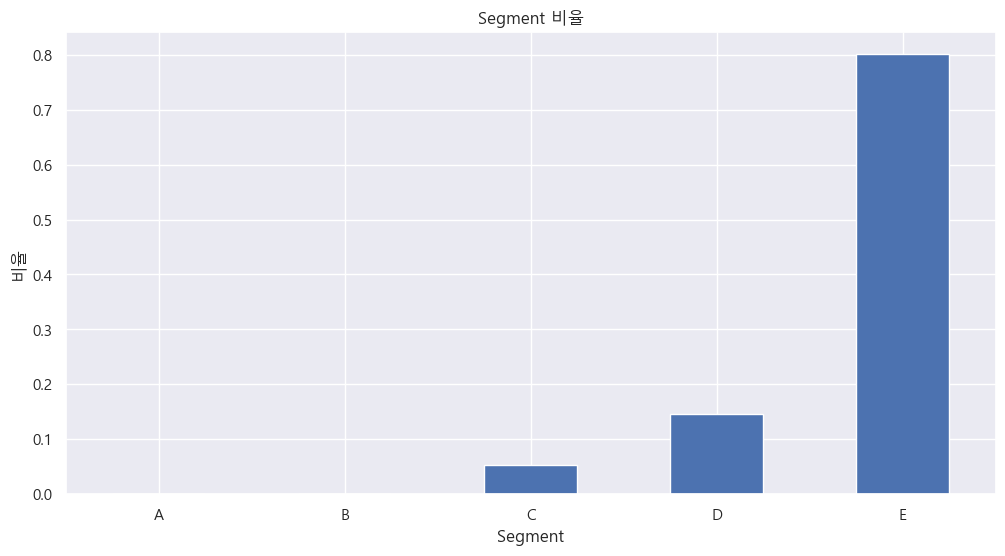

In [6]:
# Í∞Å SegmentÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
# ÎπÑÏú®(normalized)Î°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
df_all['Segment'].value_counts(normalize=True).reindex(['A', 'B', 'C', 'D', 'E']).plot(kind='bar')

# Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.title("Segment ÎπÑÏú®")

# xÏ∂ï Ïù¥Î¶Ñ
plt.xlabel("Segment")

# yÏ∂ï Ïù¥Î¶Ñ
plt.ylabel("ÎπÑÏú®")

# xÏ∂ï ÎààÍ∏à ÎùºÎ≤® ÌöåÏ†Ñ ÏÑ§Ï†ï
plt.xticks(rotation=0)

plt.show()

###  üìä Segment EÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î†§ ÏûàÎäî Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ÏÖã

- ÌèâÍ∞Ä ÏßÄÌëú Î≥ÄÍ≤Ω ‚Üí accuracy ÎåÄÏã† f1-score ÌôúÏö©
- Ïôú Segment EÍ∞Ä ÎßéÏùÑÍπå? (SegmentÎ≥Ñ ÌäπÏÑ± ÎπÑÍµê (Ïòà: Ïó∞Î†πÎåÄ, Ïù¥Ïö©Í∏àÏï°, Ïó∞Ï≤¥Ïó¨Î∂Ä Îì±)
- ÌäπÏ†ï SegmentÏóê Ï∞®Î≥ÑÌôîÎêú Î≥ÄÏàò Ï°¥Ïû¨ÌïòÎäîÍ∞Ä?

In [8]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® ÌôïÏù∏
df_all.isnull().mean().sort_values(ascending=False).head(20)

_2ÏàúÏúÑÏã†Ïö©Ï≤¥ÌÅ¨Íµ¨Î∂Ñ        0.399215
ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©      0.222596
Í∞ÄÏûÖÌÜµÏã†ÌöåÏÇ¨ÏΩîÎìú          0.161488
ÏßÅÏû•ÏãúÎèÑÎ™Ö             0.102070
ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©Í∞ÄÎä•    0.087686
ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÏùºÏûê          0.017485
_1ÏàúÏúÑÏã†Ïö©Ï≤¥ÌÅ¨Íµ¨Î∂Ñ        0.011646
Ïù¥Ïö©Í∏àÏï°_R3M_Ï≤¥ÌÅ¨_Í∞ÄÏ°±    0.000000
_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°        0.000000
_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò        0.000000
Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±       0.000000
_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°        0.000000
_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò        0.000000
Ïù¥Ïö©Í∏àÏï°_R3M_Ï≤¥ÌÅ¨       0.000000
Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©_Í∞ÄÏ°±    0.000000
Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©       0.000000
Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨     0.000000
Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨_Í∞ÄÏ°±       0.000000
Î≥¥Ïú†Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏      0.000000
Ïù¥Ïö©Í∞ÄÎä•Ïó¨Î∂Ä_Ìï¥Ïô∏Í≤∏Ïö©_Î≥∏Ïù∏    0.000000
dtype: float64

###  üìä Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†úÍ±∞
- 2ÏàúÏúÑÏã†Ïö©Ï≤¥ÌÅ¨Íµ¨Î∂Ñ        0.399215
- ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©      0.222596
- Í∞ÄÏûÖÌÜµÏã†ÌöåÏÇ¨ÏΩîÎìú          0.161488
- ÏßÅÏû•ÏãúÎèÑÎ™Ö             0.102070
- ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©Í∞ÄÎä•    0.087686
- ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÏùºÏûê          0.017485
- 1ÏàúÏúÑÏã†Ïö©Ï≤¥ÌÅ¨Íµ¨Î∂Ñ 0.011646

In [10]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÏùÑ Ï†úÍ±∞
df_all = df_all.dropna()

## ‚úÖ ÏàòÏπòÌòï Î≥ÄÏàò vs Segment Î∂ÑÌè¨ ÎπÑÍµê

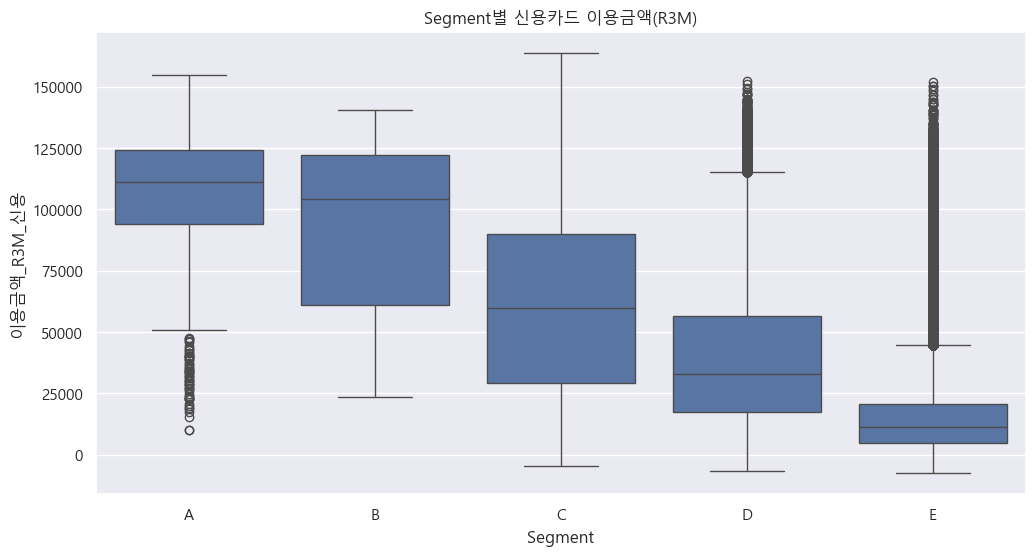

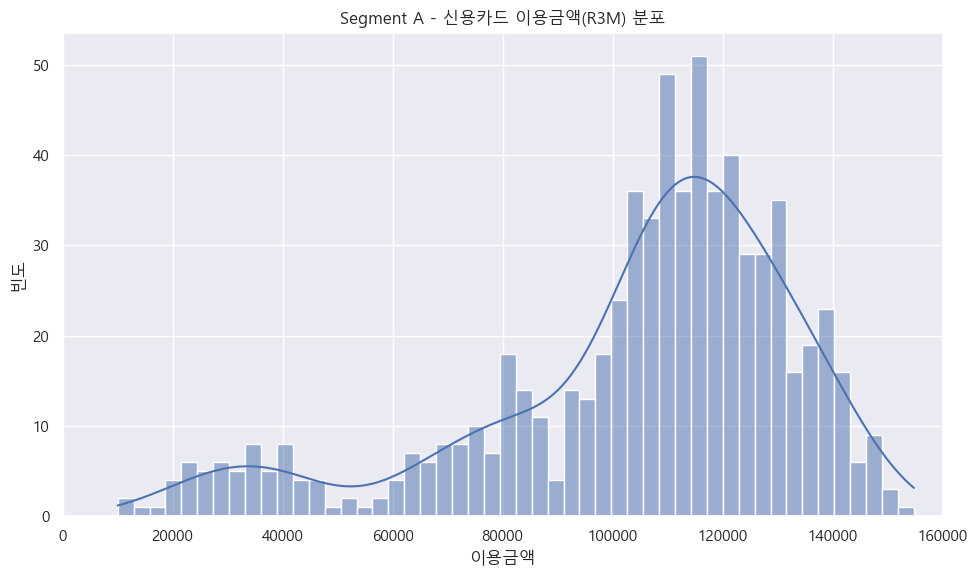

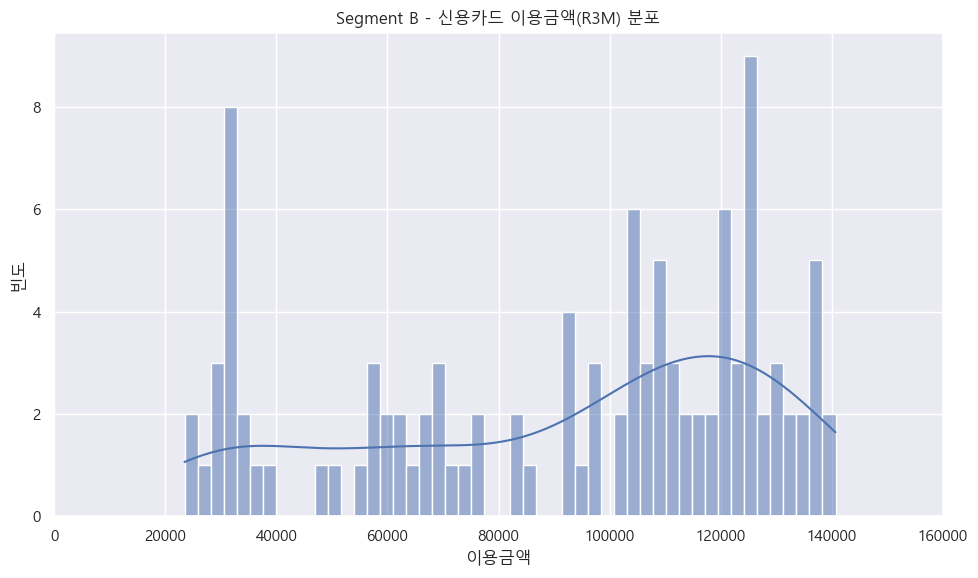

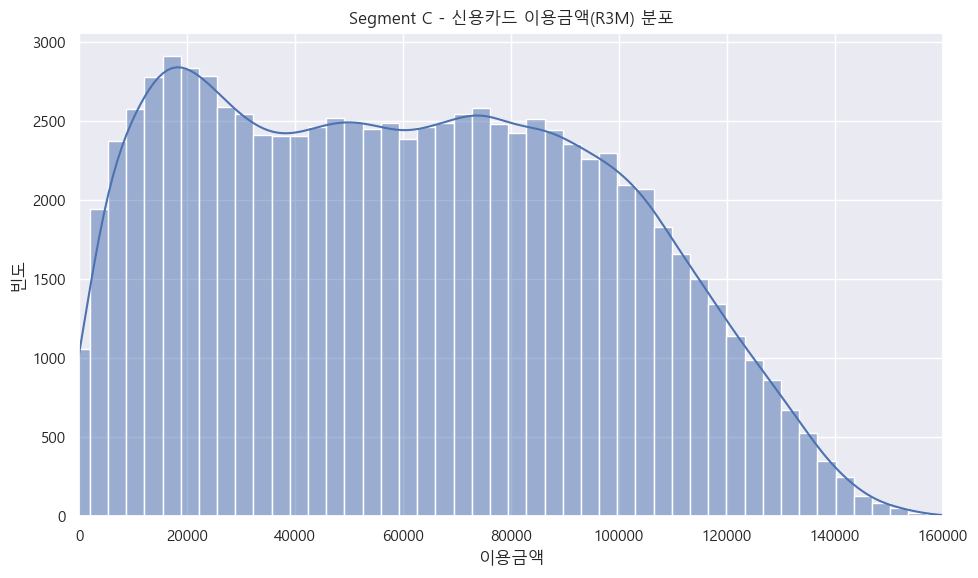

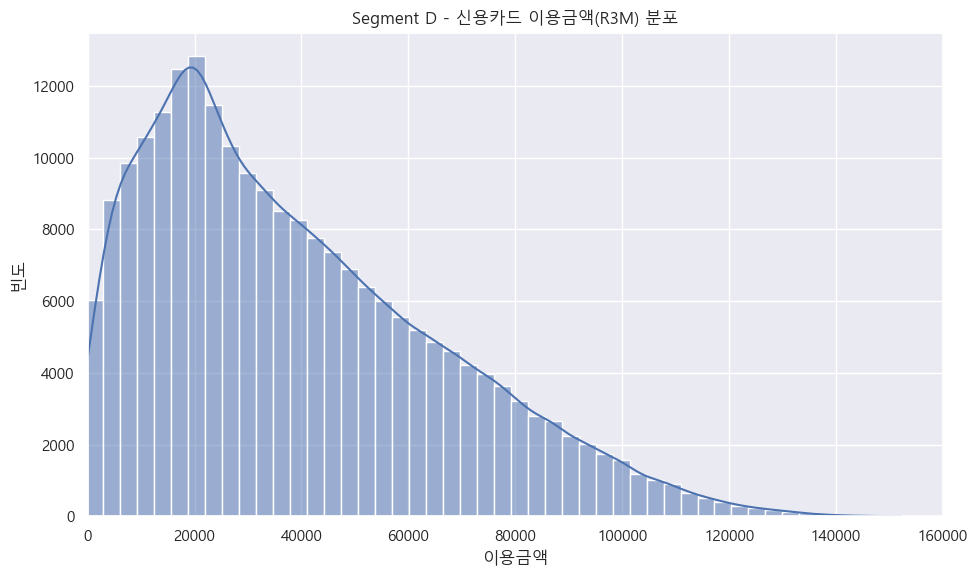

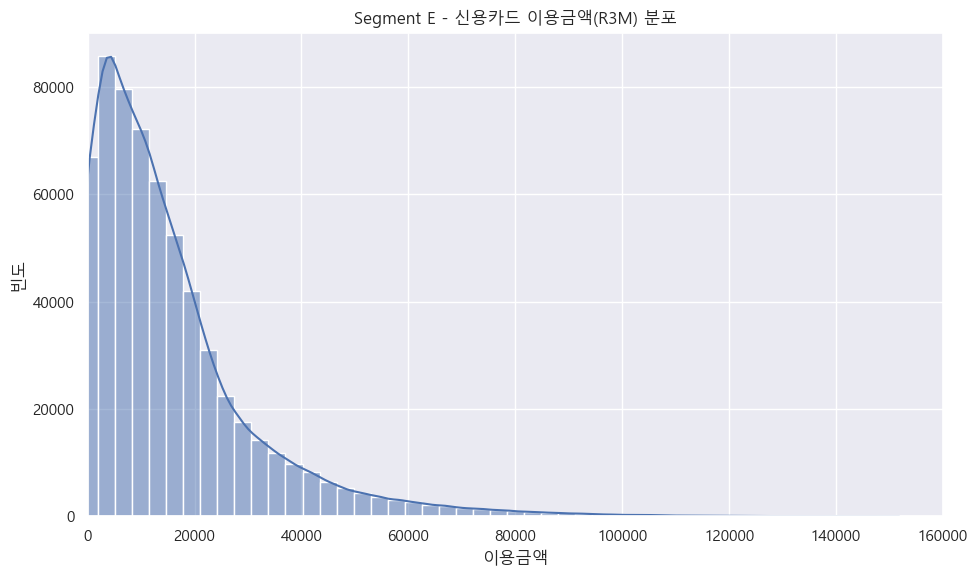

In [63]:
# BoxplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ SegmentÎ≥Ñ Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M)Ïùò Î∂ÑÌè¨ ÎπÑÍµê
sns.boxplot(data=df_all, x='Segment', y='Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', order=['A', 'B', 'C', 'D', 'E'])

plt.title("SegmentÎ≥Ñ Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M)")
plt.show()


# SegmentÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M)Ïùò Î∂ÑÌè¨ ÎπÑÍµê

segments = ['A', 'B', 'C', 'D', 'E']

# xÏ∂ï Í≥µÌÜµ Î≤îÏúÑ ÏÑ§Ï†ï (ÏõêÌïòÎäî Î≤îÏúÑÎ°ú Ï°∞Ï†ï)
x_min = 0
x_max = 160000


for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', bins=50, kde=True)


    plt.xlim(x_min, x_max)  # ‚Üê Í≥µÌÜµ Î≤îÏúÑÎ°ú Í≥†Ï†ï
    plt.title(f"Segment {seg} - Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M) Î∂ÑÌè¨")
    plt.xlabel("Ïù¥Ïö©Í∏àÏï°")
    plt.ylabel("ÎπàÎèÑ")
    plt.tight_layout()
    plt.show()

###  üìä SegmentÍ∞Ä A ‚Üí EÎ°ú Í∞àÏàòÎ°ù Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°Ïù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•Ïù¥ ÎöúÎ†∑ÌïòÍ≤å ÎÇòÌÉÄÎÇ®.

- Segment AÏôÄ BÎäî ÎÜíÏùÄ ÏÜåÎπÑ Í∑úÎ™®ÏôÄ ÎπÑÍµêÏ†Å ÎÑìÏùÄ Î∂ÑÌè¨Î•º Î≥¥ÏûÑ
- Segment EÎäî ÎÇÆÏùÄ Ï§ëÏïôÍ∞íÍ≥º Ï¢ÅÏùÄ Î≤îÏúÑÎ•º Î≥¥
- A, B, D, E Î™®Îëê ÎßéÏùÄ Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏùå
- E SegmentÏóêÏÑúÎèÑ Í≥†Ïï° Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨, Ï†ÑÎ∞òÏ†Å ÏÜåÎπÑ ÏàòÏ§ÄÏùÄ ÎÇÆÏßÄÎßå ÏÜåÏàò Í≥†ÏÇ¨Ïö©Ïûê Ìè¨Ìï®

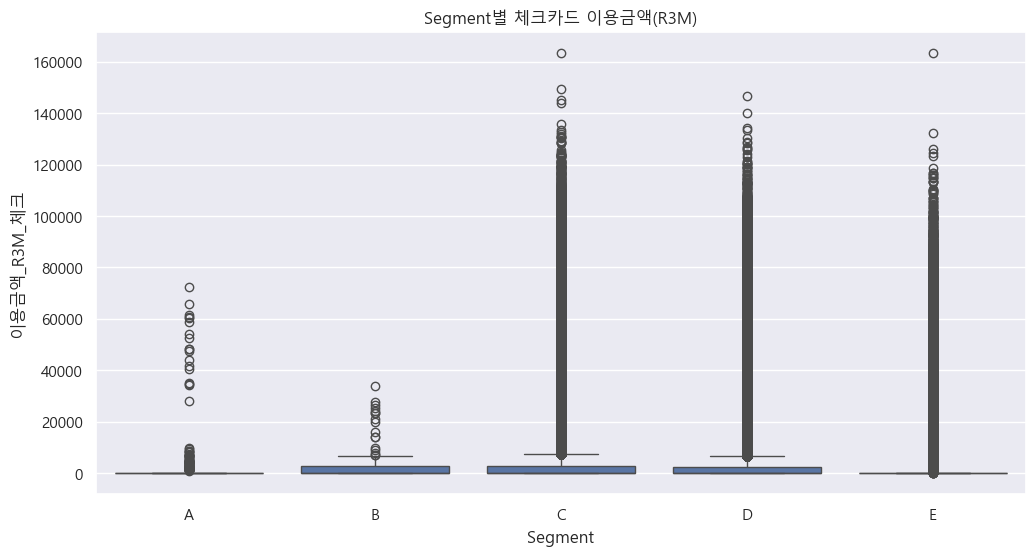

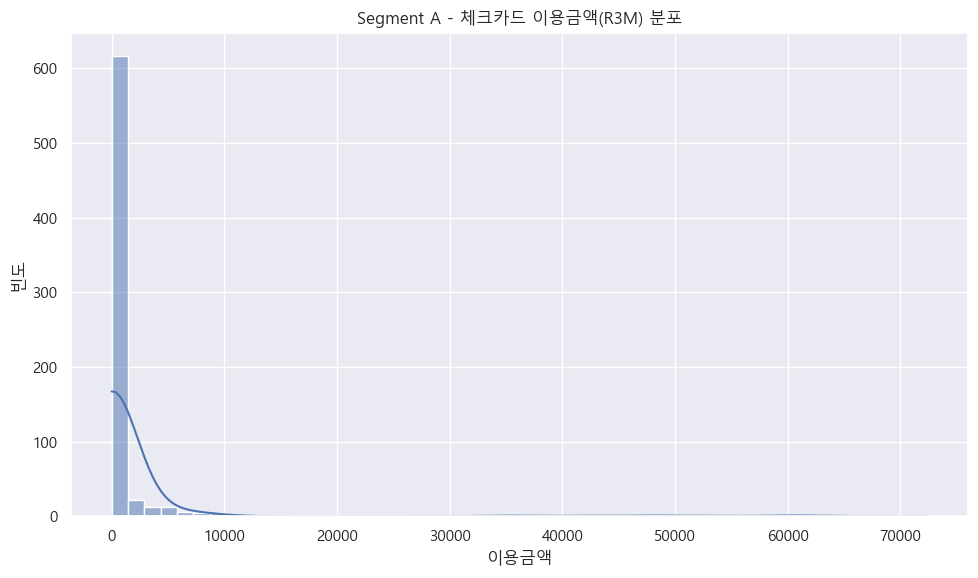

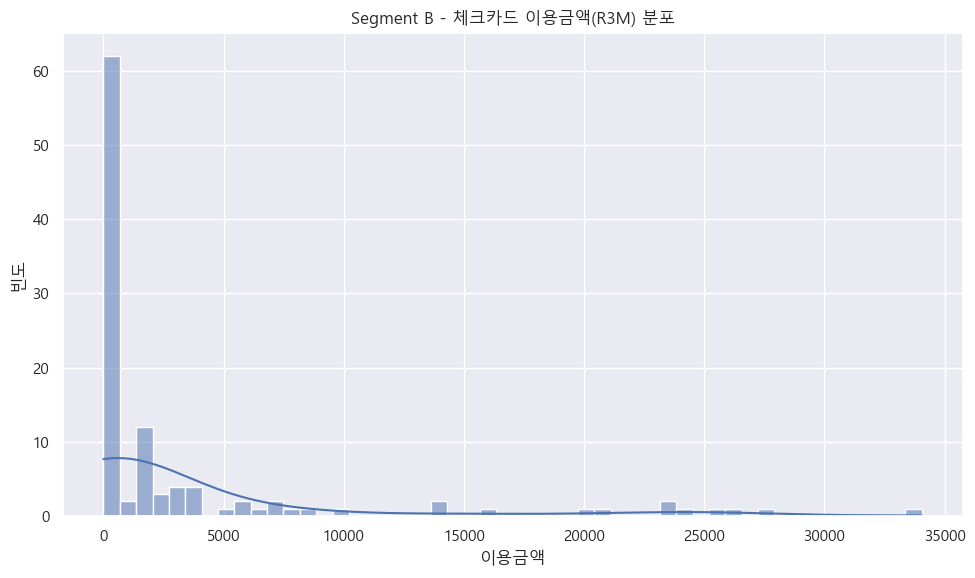

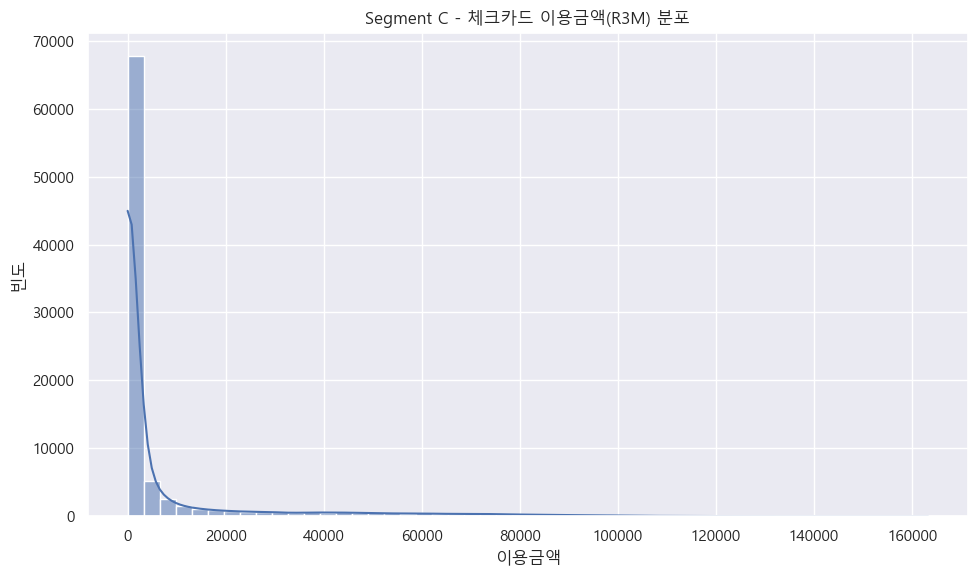

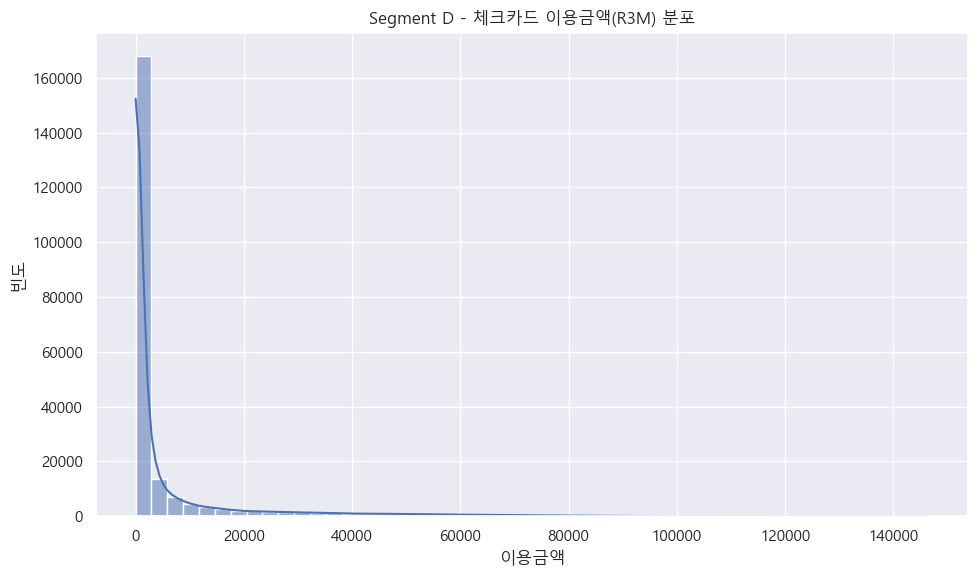

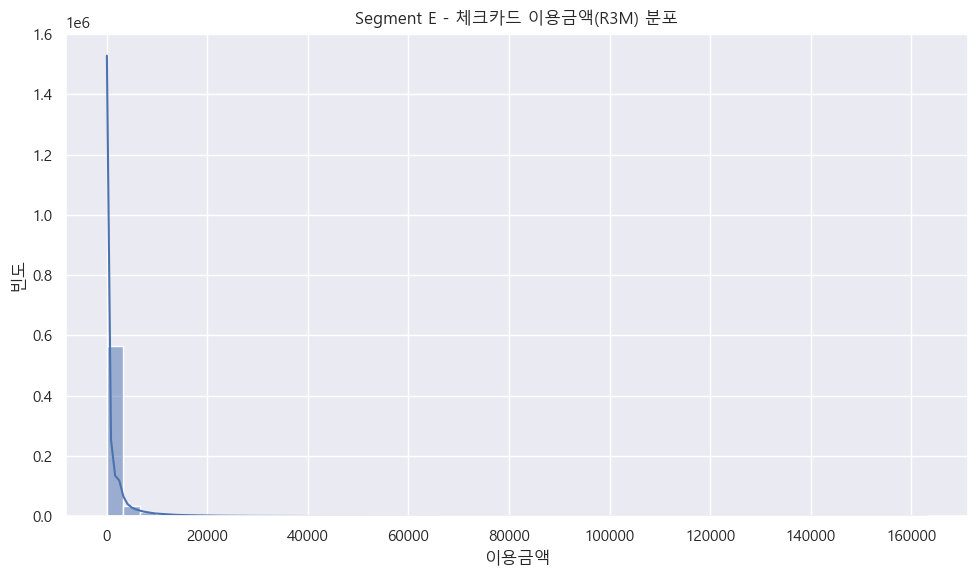

In [32]:
# BoxplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ SegmentÎ≥Ñ Ï≤¥ÌÅ¨Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M)Ïùò Î∂ÑÌè¨ ÎπÑÍµê

sns.boxplot(data=df_all, x='Segment', y='Ïù¥Ïö©Í∏àÏï°_R3M_Ï≤¥ÌÅ¨', order=['A', 'B', 'C', 'D', 'E'])

plt.title("SegmentÎ≥Ñ Ï≤¥ÌÅ¨Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M)")
plt.show()

# SegmentÎ≥Ñ Ï≤¥ÌÅ¨Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M)Ïùò Î∂ÑÌè¨ ÎπÑÍµê

segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='Ïù¥Ïö©Í∏àÏï°_R3M_Ï≤¥ÌÅ¨', bins=50, kde=True)
    
    plt.title(f"Segment {seg} - Ï≤¥ÌÅ¨Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°(R3M) Î∂ÑÌè¨")
    plt.xlabel("Ïù¥Ïö©Í∏àÏï°")
    plt.ylabel("ÎπàÎèÑ")
    plt.tight_layout()
    plt.show()

###  üìä Ï≤¥ÌÅ¨Ïπ¥Îìú Ïù¥Ïö©Í∏àÏï°ÏùÄ Í∏àÏï° Í∑úÎ™®Í∞Ä ÏûëÍ≥† ÏùºÍ¥ÄÏÑ± ÏóÜÎäî ÏÜåÎπÑ Ìå®ÌÑ¥ÏùÑ Í∞ÄÏßê

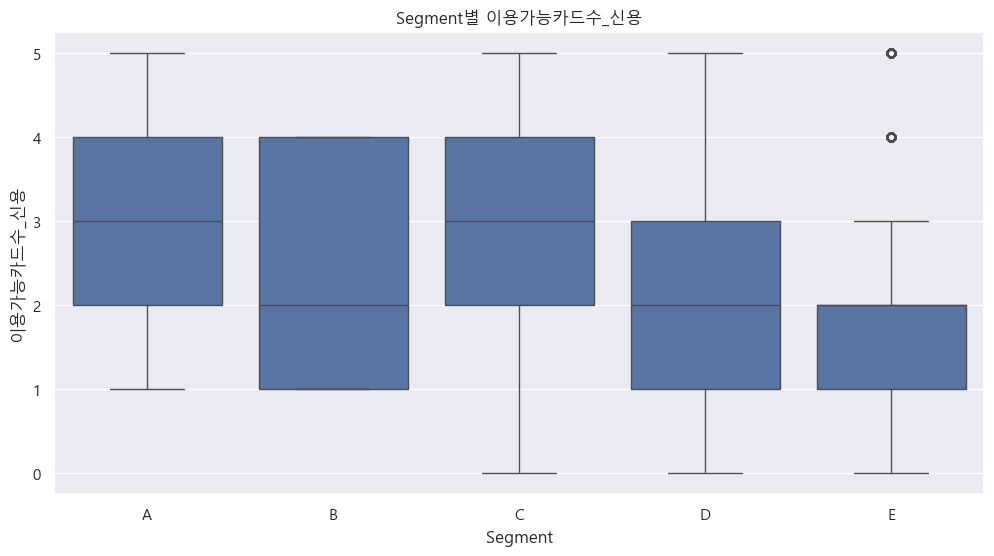

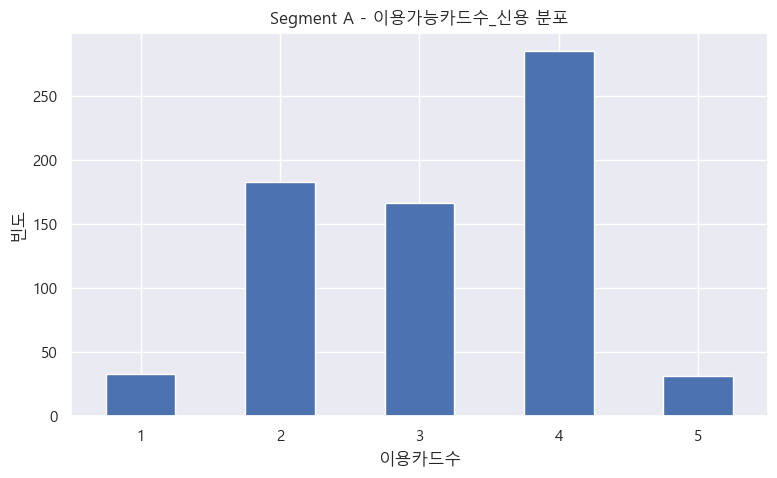

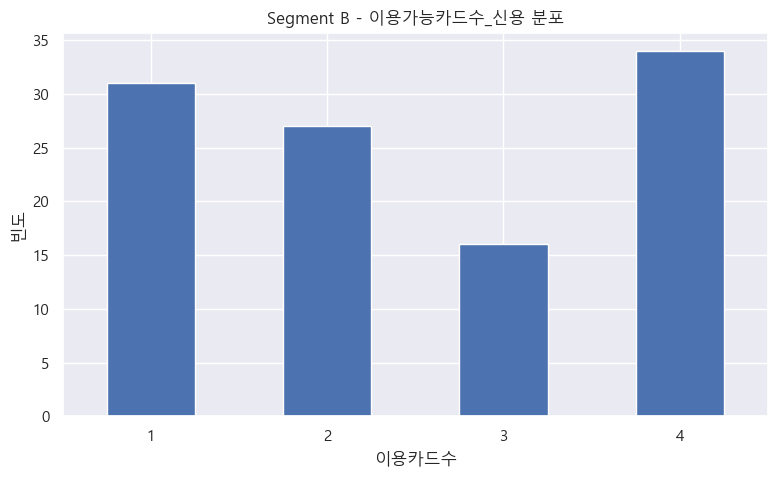

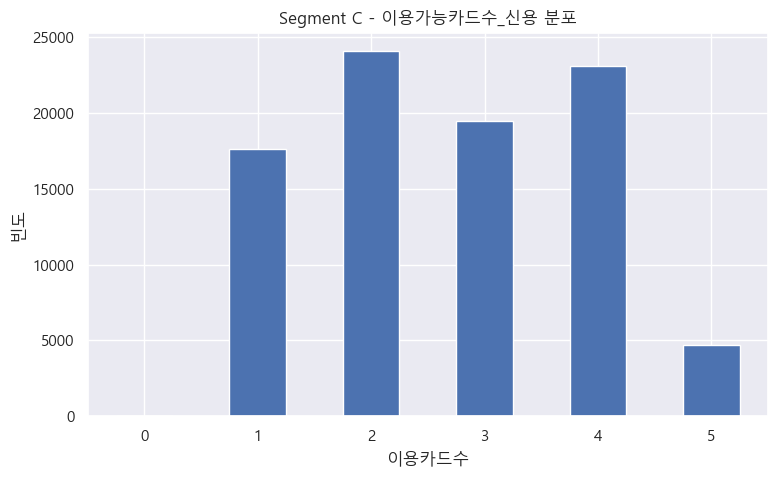

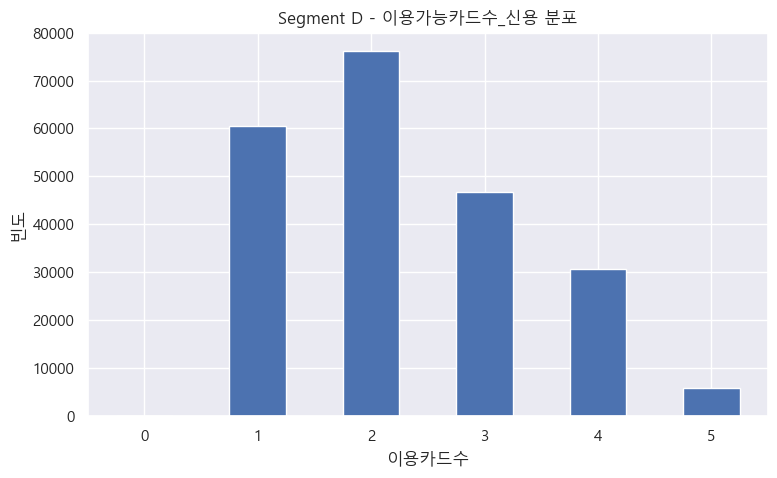

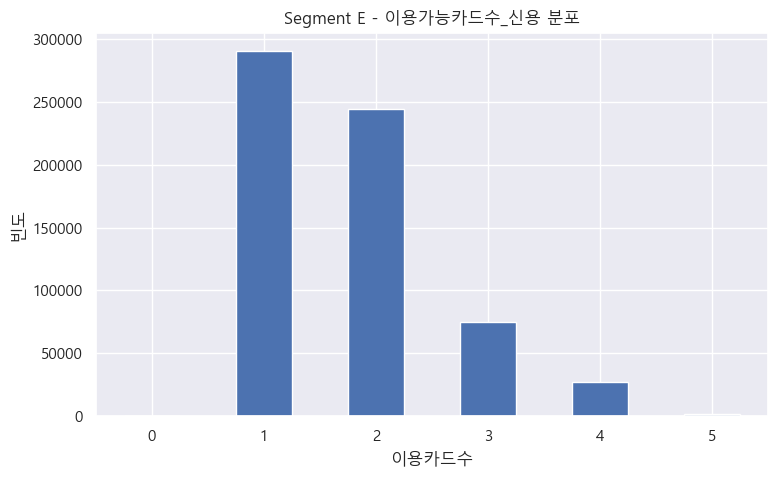

In [36]:
# BoxplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ SegmentÎ≥Ñ Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©Ïùò Î∂ÑÌè¨ ÎπÑÍµê
sns.boxplot(data=df_all, x='Segment', y='Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©', order=['A', 'B', 'C', 'D', 'E'])

plt.title("SegmentÎ≥Ñ Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©")
plt.show()


# SegmentÎ≥Ñ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º Ïù¥Ïö©ÌïòÏó¨ Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö©Ïπ¥ÎìúÏàòÏùò Î∂ÑÌè¨ ÎπÑÍµê

segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(8, 5))
    
    # ÌäπÏ†ï SegmentÏóêÏÑúÏùò Í∞í ÎπàÎèÑÏàò Í≥ÑÏÇ∞ (Ï†ïÏàòÌòï Î≥ÄÏàò ÎåÄÏÉÅ)
    df_seg = df_all[df_all['Segment'] == seg]
    df_seg['Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©'].value_counts().sort_index().plot(kind='bar')

    plt.title(f"Segment {seg} - Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö© Î∂ÑÌè¨")
    plt.xlabel("Ïù¥Ïö©Ïπ¥ÎìúÏàò")
    plt.ylabel("ÎπàÎèÑ")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [85]:
df_A = df_all[df_all['Segment'] == 'A']['Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©'].value_counts().sort_index()
df_B = df_all[df_all['Segment'] == 'B']['Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©'].value_counts().sort_index()
df_E = df_all[df_all['Segment'] == 'E']['Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©'].value_counts().sort_index()

print(f'Ïù¥Ïö©Ïπ¥ÎìúÏàò A: {df_A}')
print(f'Ïù¥Ïö©Ïπ¥ÎìúÏàò B: {df_B}')
print(f'Ïù¥Ïö©Ïπ¥ÎìúÏàò E: {df_E}')

Ïù¥Ïö©Ïπ¥ÎìúÏàò A: Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©
1     33
2    183
3    166
4    285
5     31
Name: count, dtype: int64
Ïù¥Ïö©Ïπ¥ÎìúÏàò B: Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©
1    31
2    27
3    16
4    34
Name: count, dtype: int64
Ïù¥Ïö©Ïπ¥ÎìúÏàò E: Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©
0       103
1    290496
2    244205
3     74737
4     26911
5      1606
Name: count, dtype: int64


###  üìä Segment EÎäî Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú 1~2Ïû• ÏàòÏ§ÄÏóê Î™∞Î¶º

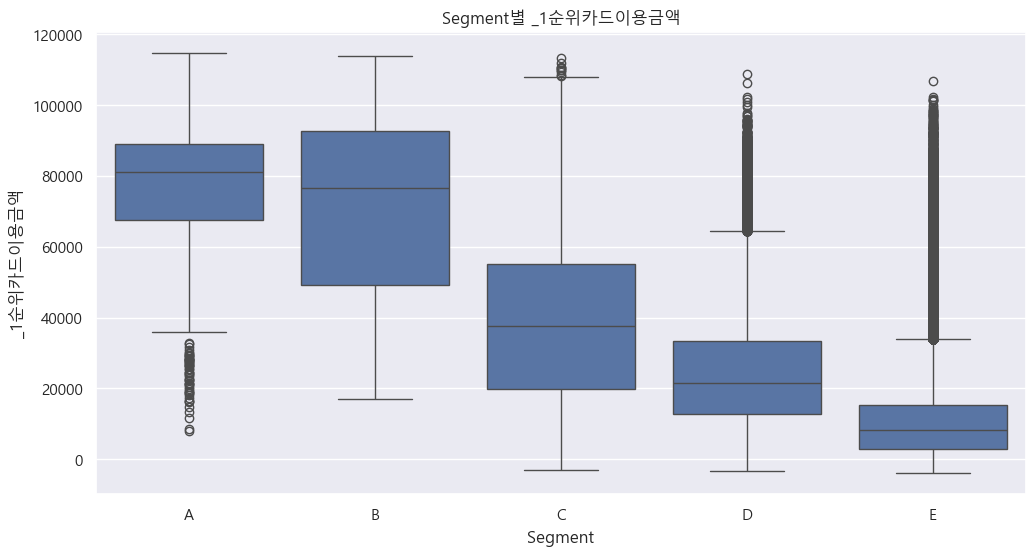

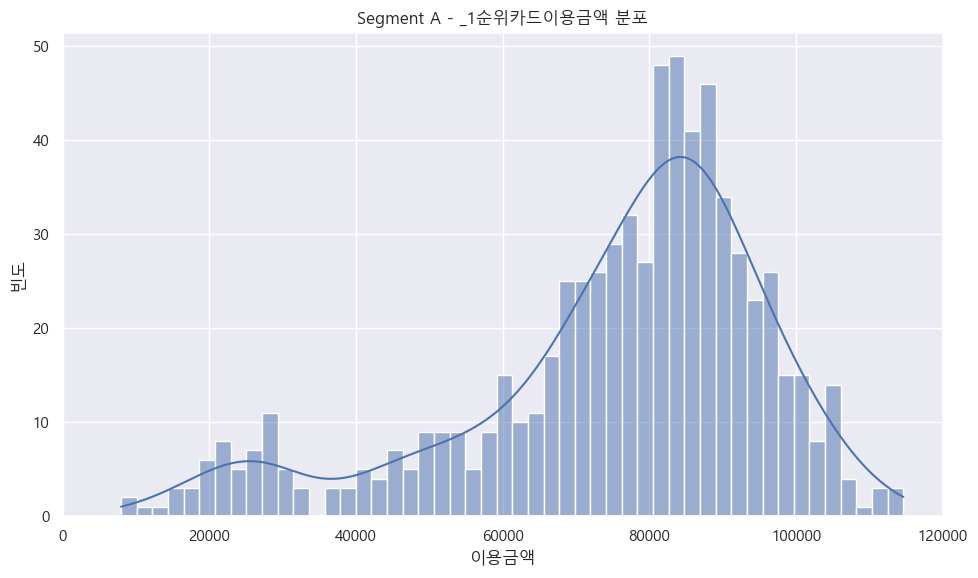

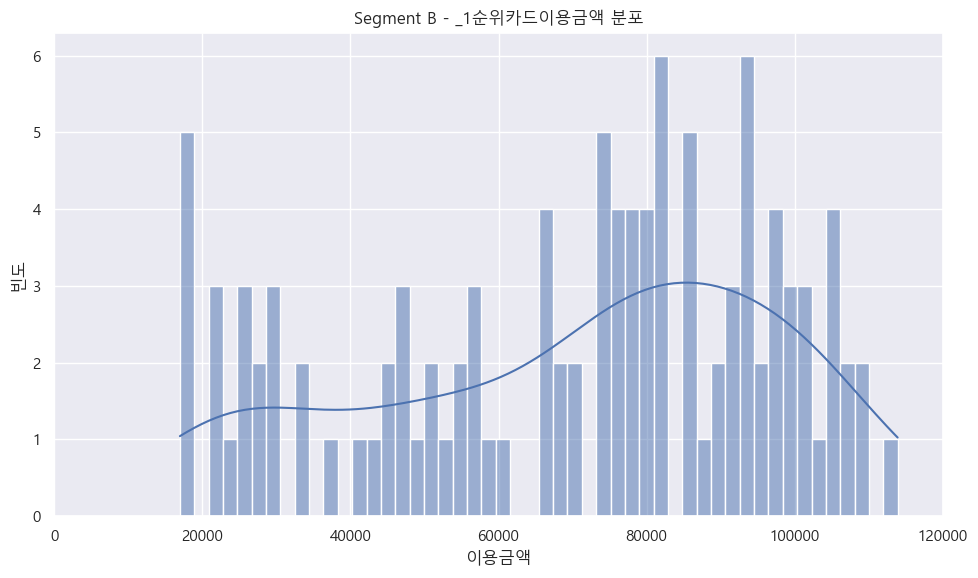

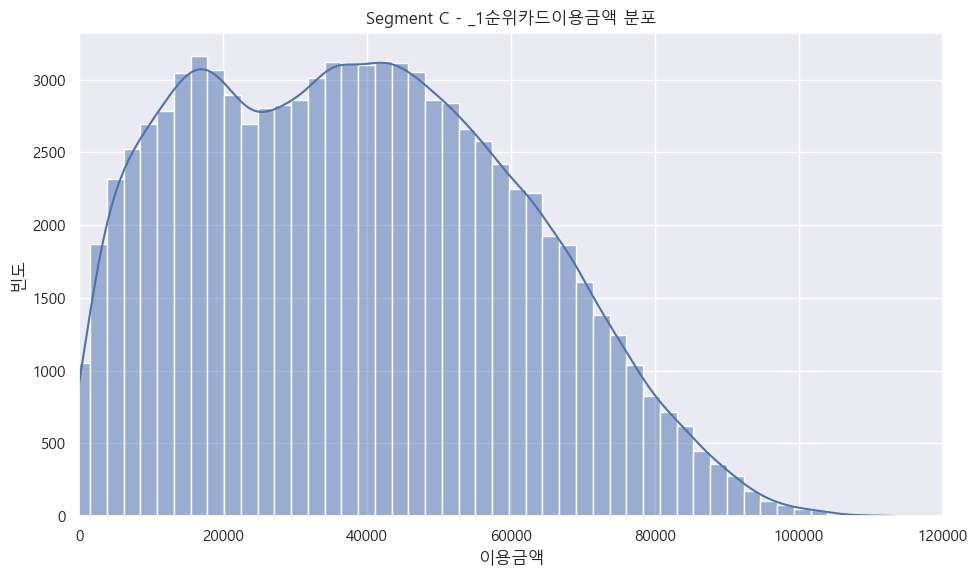

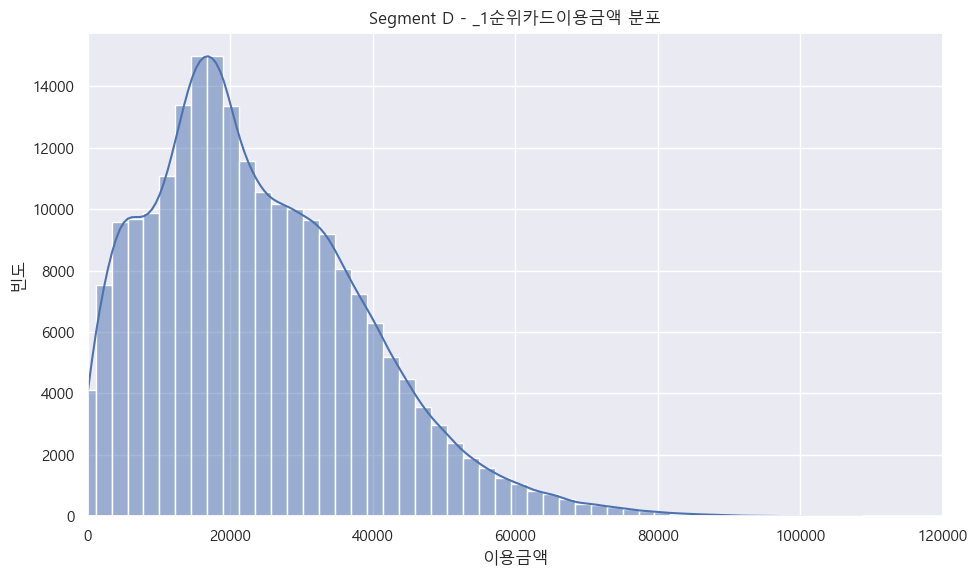

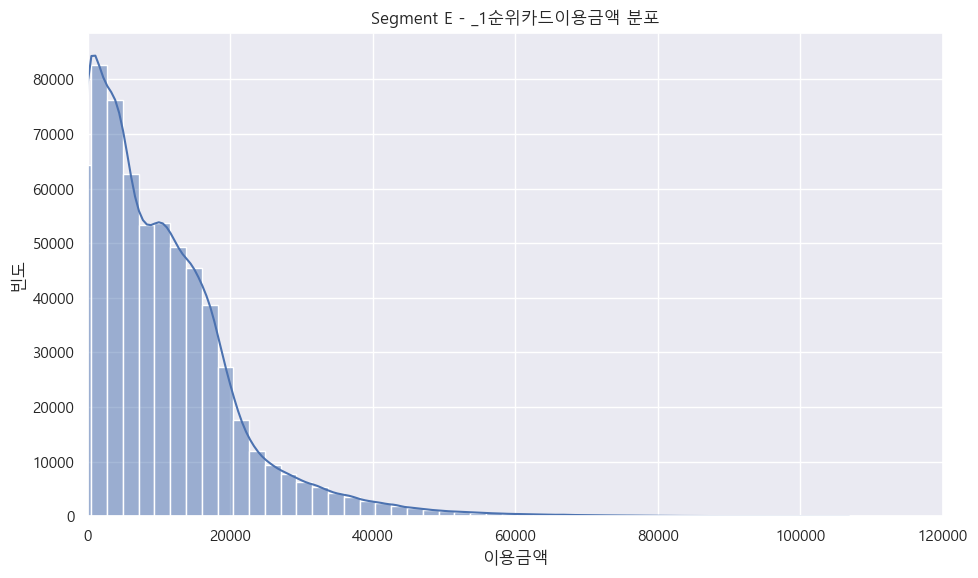

In [44]:
# BoxplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ SegmentÎ≥Ñ _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°Ïùò Î∂ÑÌè¨ ÎπÑÍµê
sns.boxplot(data=df_all, x='Segment', y='_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', order=['A', 'B', 'C', 'D', 'E'])

plt.title("SegmentÎ≥Ñ _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°")
plt.show()


segments = ['A', 'B', 'C', 'D', 'E']

# xÏ∂ï Í≥µÌÜµ Î≤îÏúÑ ÏÑ§Ï†ï (ÏõêÌïòÎäî Î≤îÏúÑÎ°ú Ï°∞Ï†ï)
x_min = 0
x_max = 120000

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', bins=50, kde=True)

    
    plt.xlim(x_min, x_max)  # ‚Üê Í≥µÌÜµ Î≤îÏúÑÎ°ú Í≥†Ï†ï
    plt.title(f"Segment {seg} - _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï° Î∂ÑÌè¨")
    plt.xlabel("Ïù¥Ïö©Í∏àÏï°")
    plt.ylabel("ÎπàÎèÑ")
    plt.tight_layout()
    plt.show()

###  üìä Ïã†Ïö©Ïπ¥Îìú Ïù¥Ïö© Í∏àÏï°Í≥º Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º Î≥¥ÏûÑ

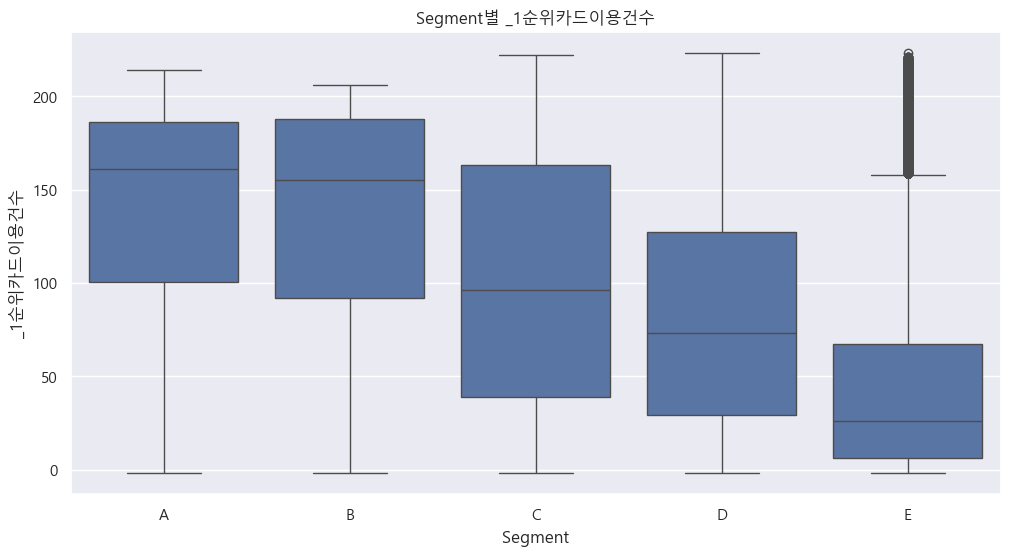

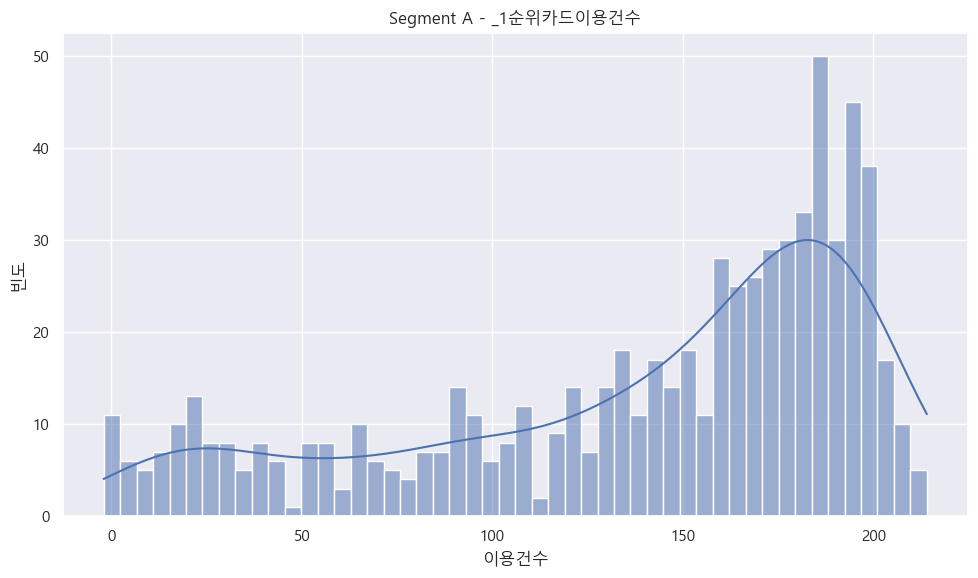

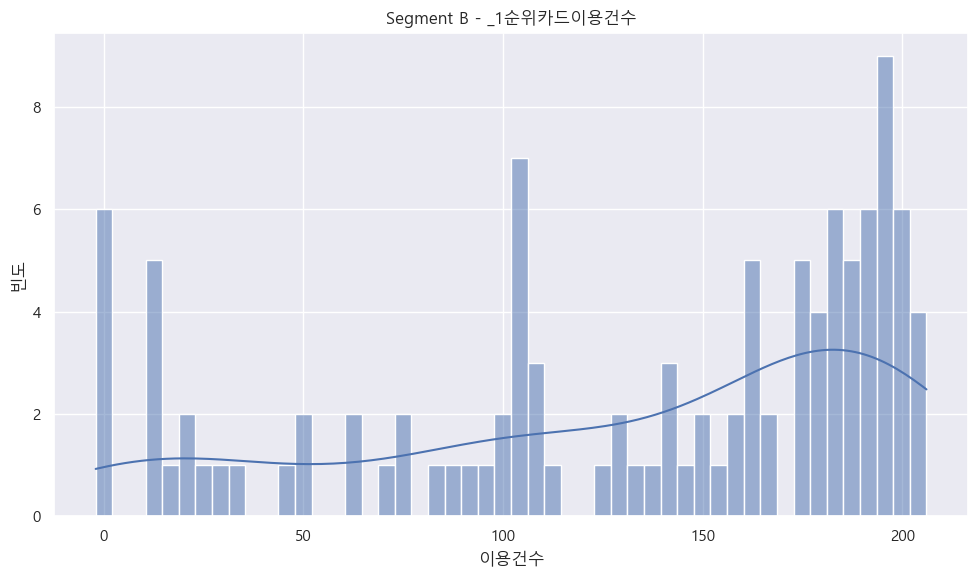

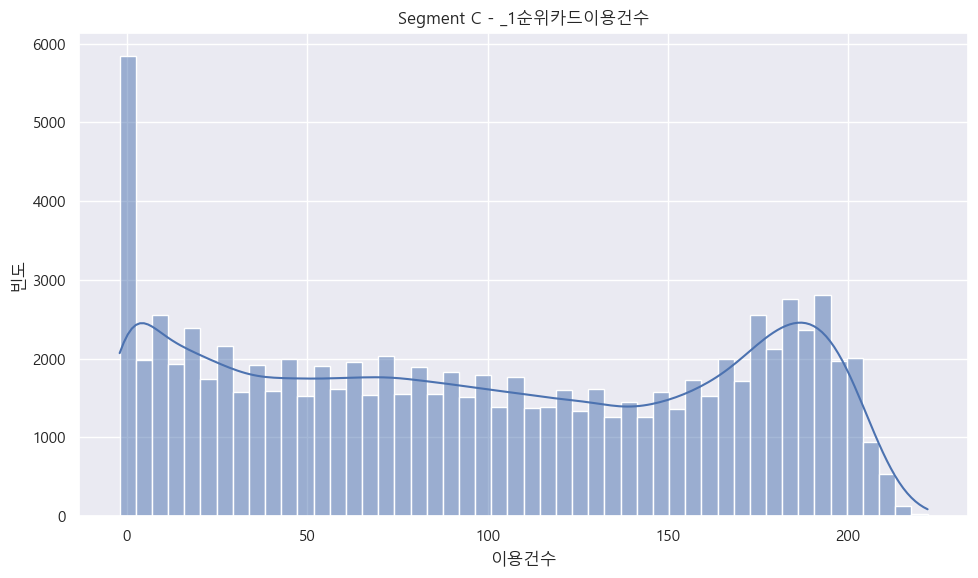

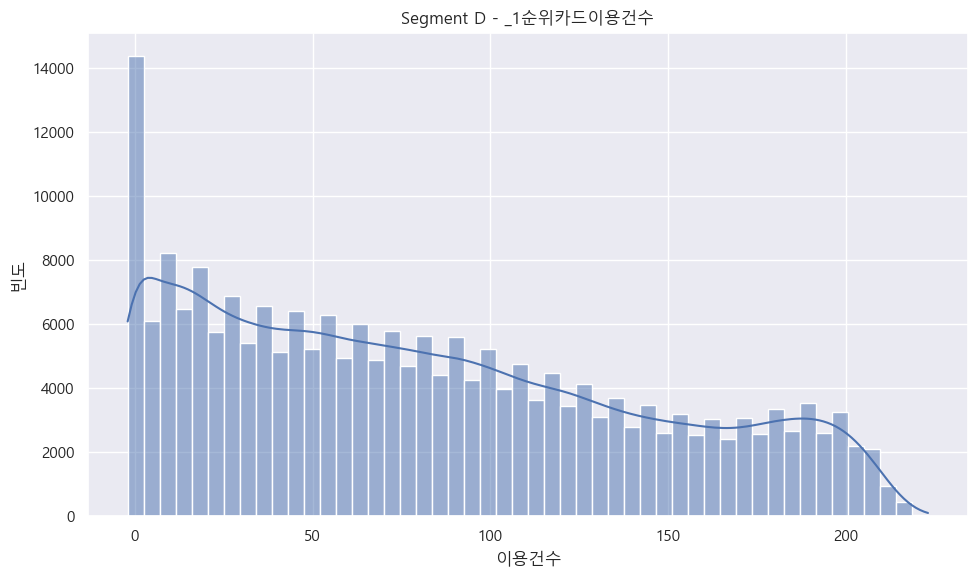

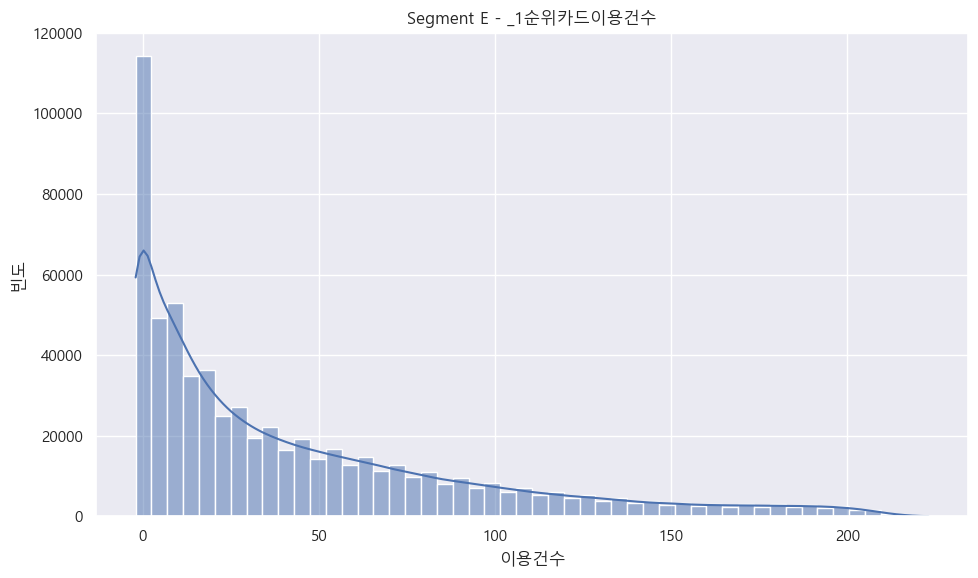

In [42]:
# BoxplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ SegmentÎ≥Ñ _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°Ïùò Î∂ÑÌè¨ ÎπÑÍµê
sns.boxplot(data=df_all, x='Segment', y='_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò', order=['A', 'B', 'C', 'D', 'E'])

plt.title("SegmentÎ≥Ñ _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò")
plt.show()


segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò', bins=50, kde=True)
    
    plt.title(f"Segment {seg} - _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò")
    plt.xlabel("Ïù¥Ïö©Í±¥Ïàò")
    plt.ylabel("ÎπàÎèÑ")
    plt.tight_layout()
    plt.show()

###  üìä Segment A, B: Ï£ºÎ†• Ïπ¥Îìú Ïù¥Ïö© Í±¥ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÍ≥†, Ï§ëÏïôÍ∞íÏù¥ ÎÜíÏùå
- Ï£ºÎ†• Ïπ¥ÎìúÏóê ÎåÄÌïú Ï∂©ÏÑ±ÎèÑÍ∞Ä ÎÜíÏùÄ Í≥†Í∞ùÏùº Í∞ÄÎä•ÏÑ±

###  üìä Segment C ‚Üí D ‚Üí EÎ°ú Í∞àÏàòÎ°ù Ïù¥Ïö© Í±¥ÏàòÏùò Ï§ëÏïôÍ∞í Î∞è Ï†ÑÏ≤¥ Î∂ÑÌè¨Í∞Ä Í∞êÏÜå
- Ïπ¥Îìú Ïù¥Ïö© ÌôúÎèôÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÄÎäî Í≥†Í∞ùÍµ∞ÏúºÎ°ú Ìï¥ÏÑù Í∞ÄÎä•

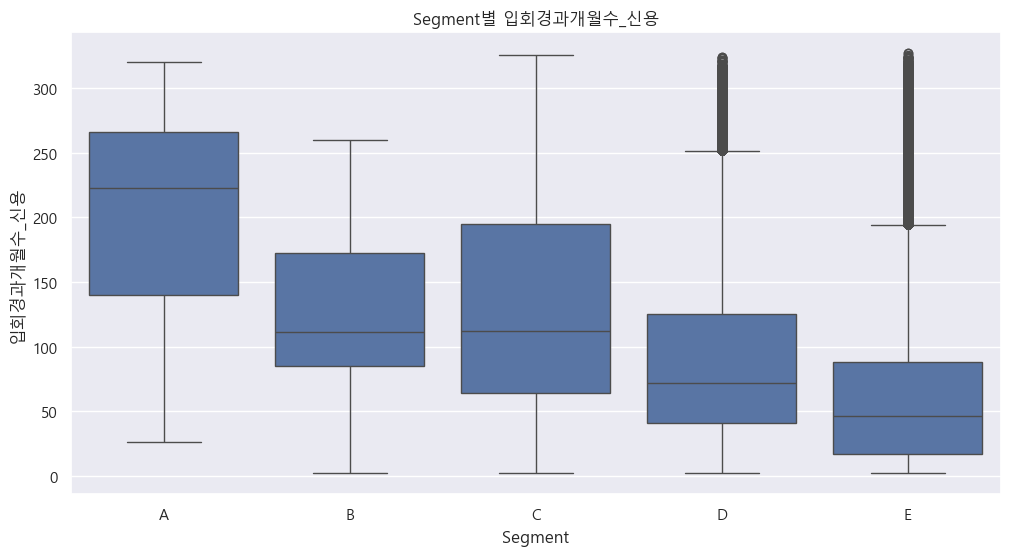

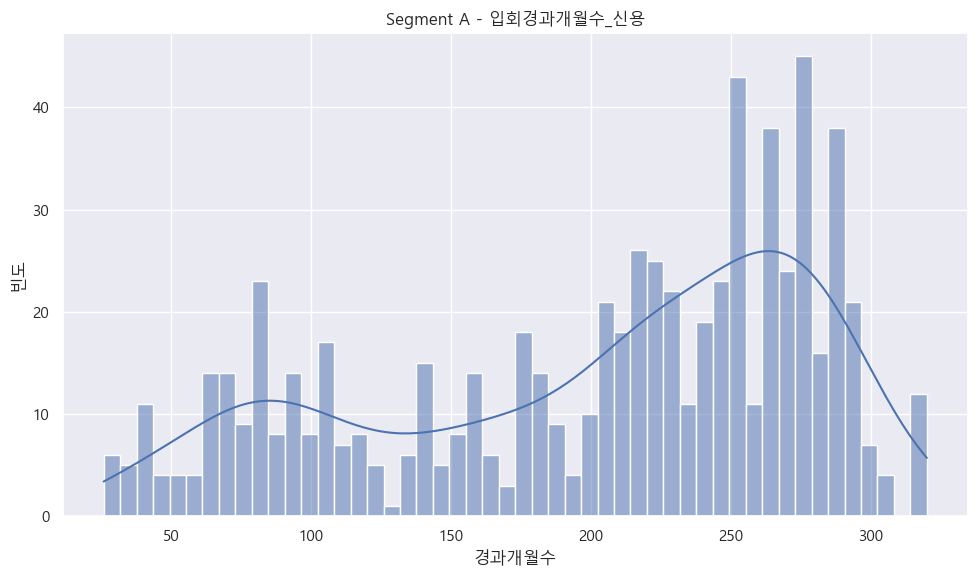

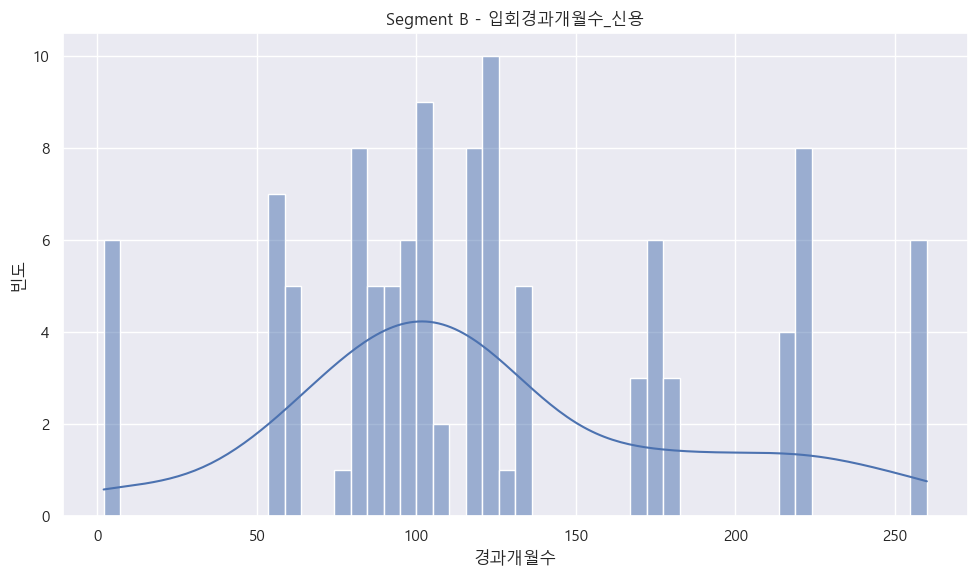

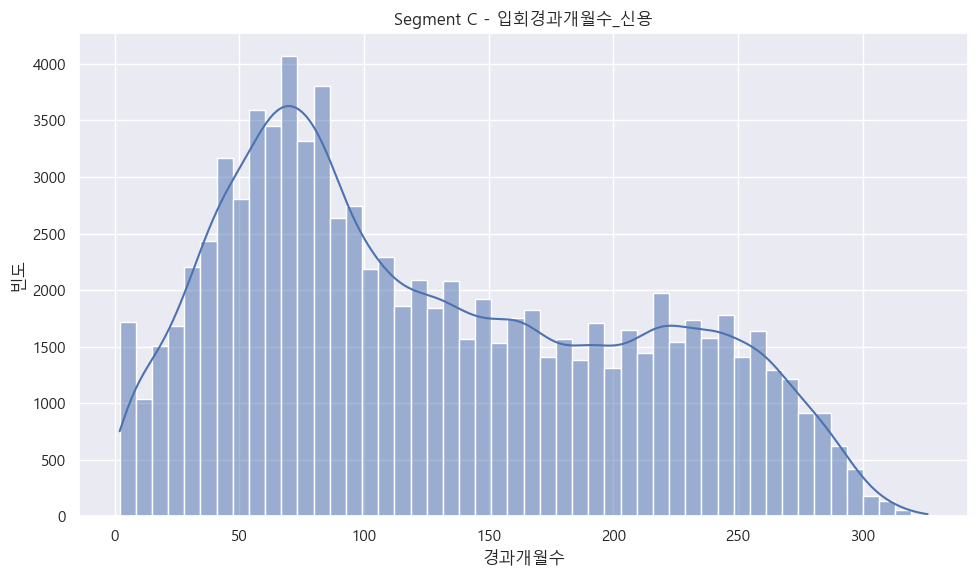

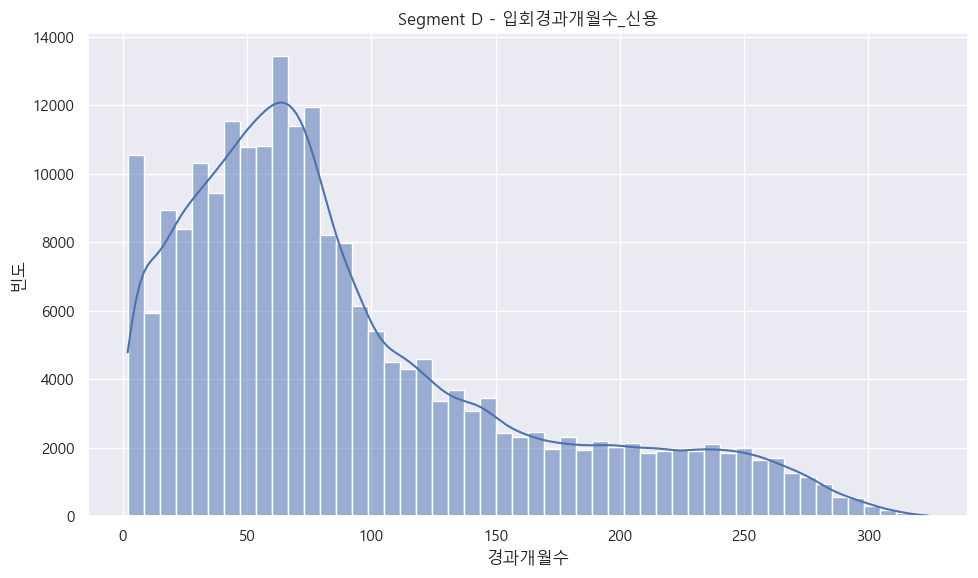

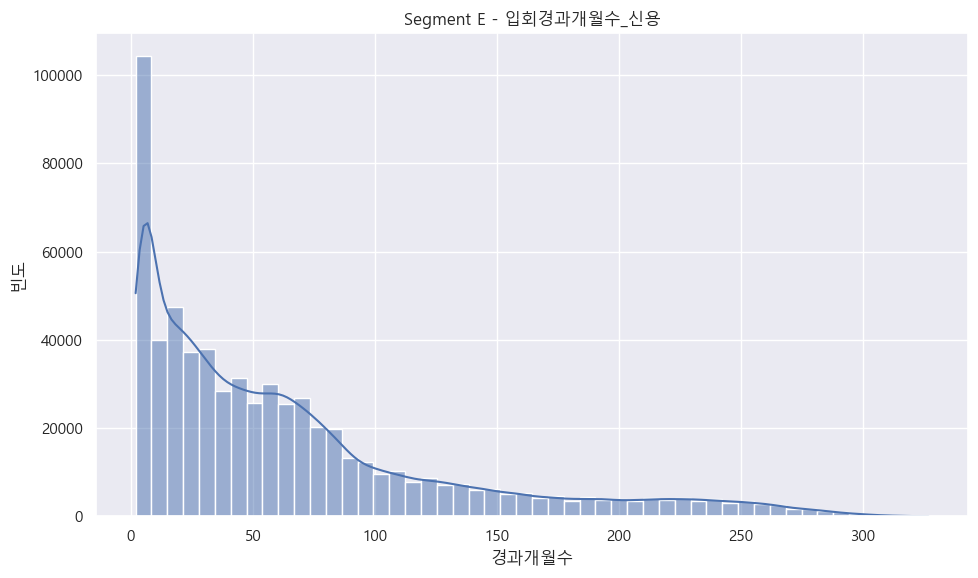

In [46]:
# BoxplotÏùÑ Ïù¥Ïö©ÌïòÏó¨ SegmentÎ≥Ñ _1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°Ïùò Î∂ÑÌè¨ ÎπÑÍµê
sns.boxplot(data=df_all, x='Segment', y='ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©', order=['A', 'B', 'C', 'D', 'E'])

plt.title("SegmentÎ≥Ñ ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©")
plt.show()


segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©', bins=50, kde=True)
    
    plt.title(f"Segment {seg} - ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©")
    plt.xlabel("Í≤ΩÍ≥ºÍ∞úÏõîÏàò")
    plt.ylabel("ÎπàÎèÑ")
    plt.tight_layout()
    plt.show()

###  üìä Segment A ‚Üí EÎ°ú Í∞àÏàòÎ°ù ÏûÖÌöå Í≤ΩÍ≥º Í∞úÏõî Ïàò(Ïã†Ïö©Ïπ¥Îìú Î≥¥Ïú†Í∏∞Í∞Ñ)Í∞Ä Í∞êÏÜå
- Ï¶â, Segment EÎäî Ïã†Í∑ú Í≥†Í∞ù, Segment AÎäî Ïû•Í∏∞ Í≥†Í∞ùÏùº Í∞ÄÎä•ÏÑ± ÎÜíÏùå

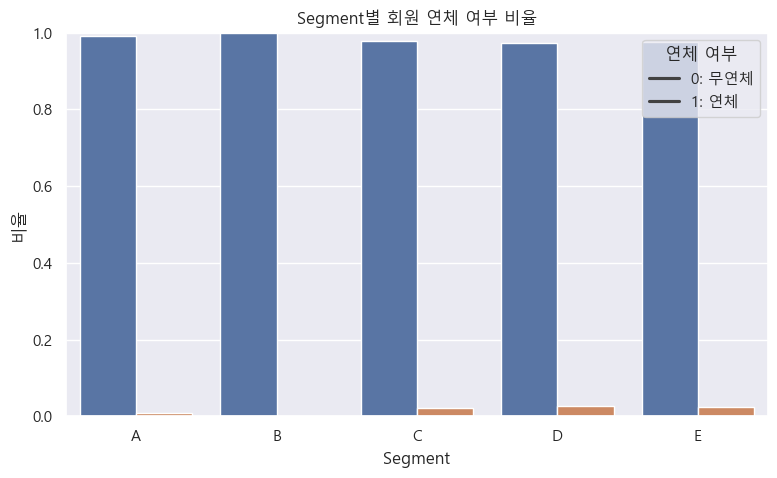

In [58]:
# 1. SegmentÎ≥Ñ, Ïó∞Ï≤¥Ïó¨Î∂ÄÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
proportion_df = (
    df_all.groupby('Segment')['ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥']
    .value_counts(normalize=True)
    .rename('ÎπÑÏú®')
    .reset_index()
)

# 2. ÏãúÍ∞ÅÌôî (SegmentÎ≥ÑÎ°ú hue Ï†ÅÏö©)
plt.figure(figsize=(8, 5))
sns.barplot(data=proportion_df, x='Segment', y='ÎπÑÏú®', hue='ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥')

plt.title("SegmentÎ≥Ñ ÌöåÏõê Ïó∞Ï≤¥ Ïó¨Î∂Ä ÎπÑÏú®")
plt.ylabel("ÎπÑÏú®")
plt.xlabel("Segment")
plt.ylim(0, 1)
plt.legend(title="Ïó∞Ï≤¥ Ïó¨Î∂Ä", labels=["0: Î¨¥Ïó∞Ï≤¥", "1: Ïó∞Ï≤¥"])
plt.tight_layout()
plt.show()

###  üìä Ïó∞Ï≤¥ Ïó¨Î∂ÄÎäî ÏÑ∏Í∑∏Î®ºÌä∏Î≥ÑÎ°ú ÌÅ∞ Ï∞®Ïù¥Î•º Î≥¥Ïù¥ÏßÄ ÏïäÏùå
- CÏù¥ÌïòÏóêÏÑú Ïó∞Ï≤¥ ÎπÑÏú®Ïù¥ ÏïΩÍ∞Ñ Ï¶ùÍ∞ÄÌï® 

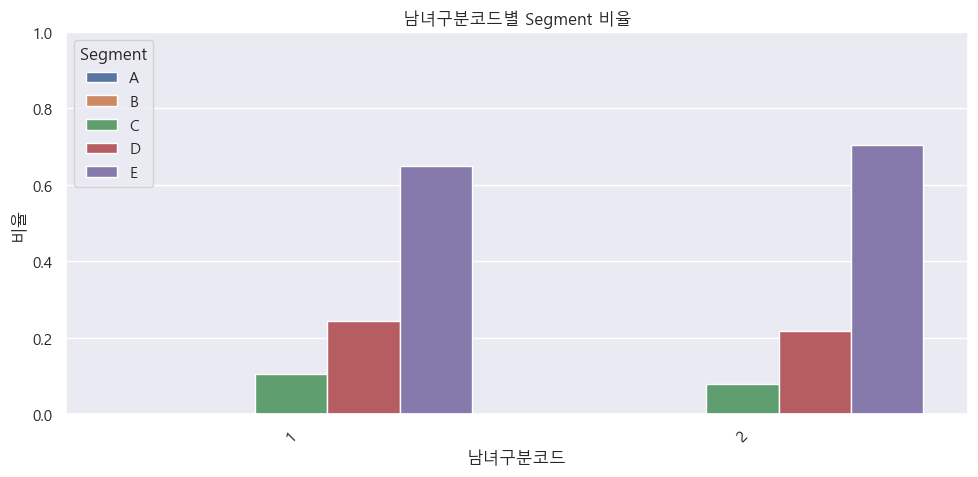

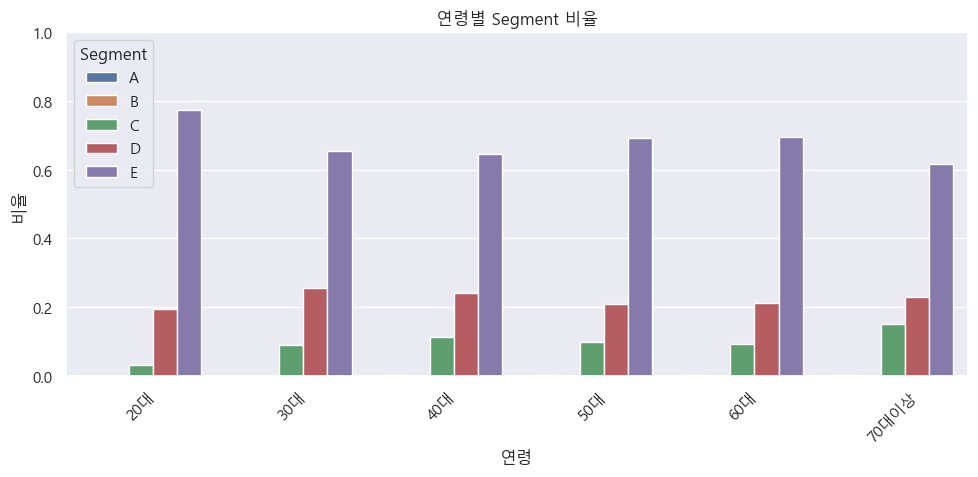

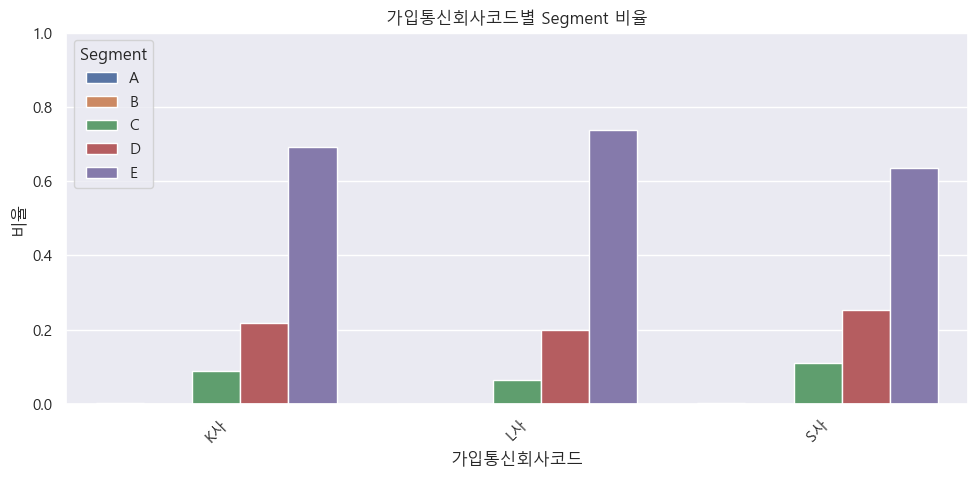

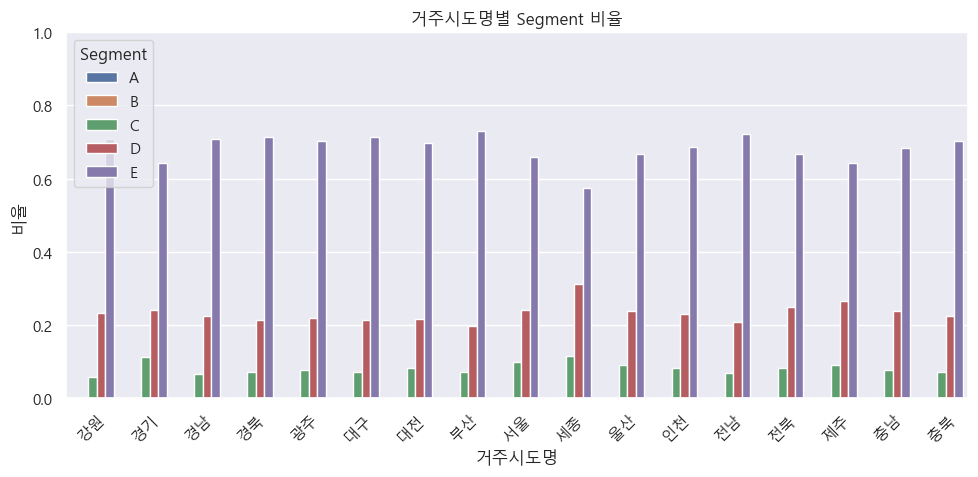

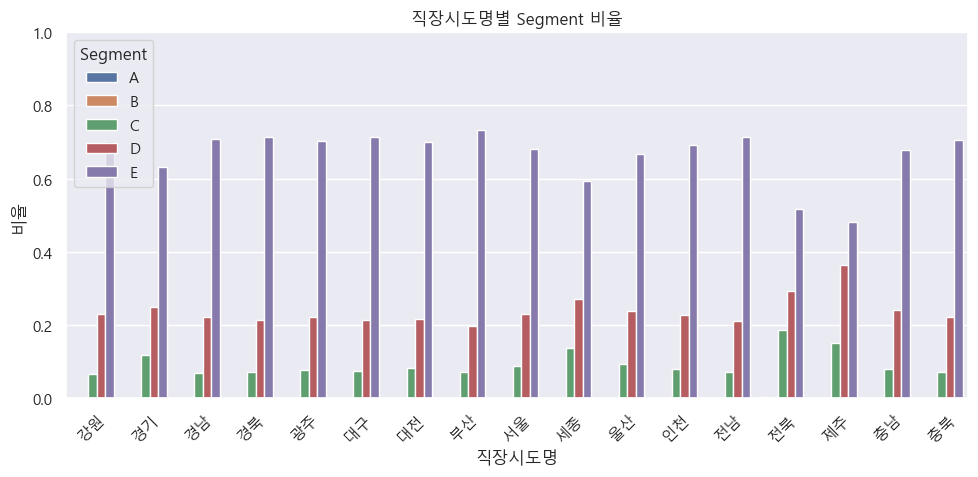

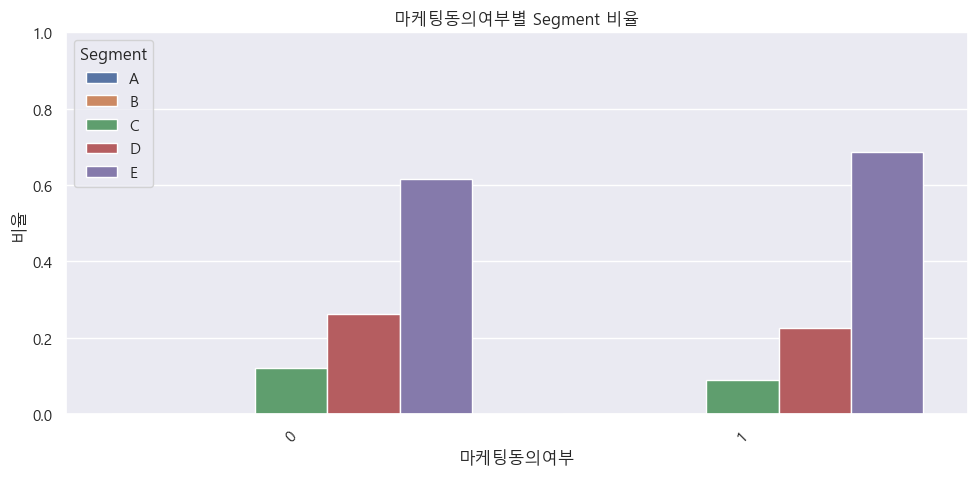

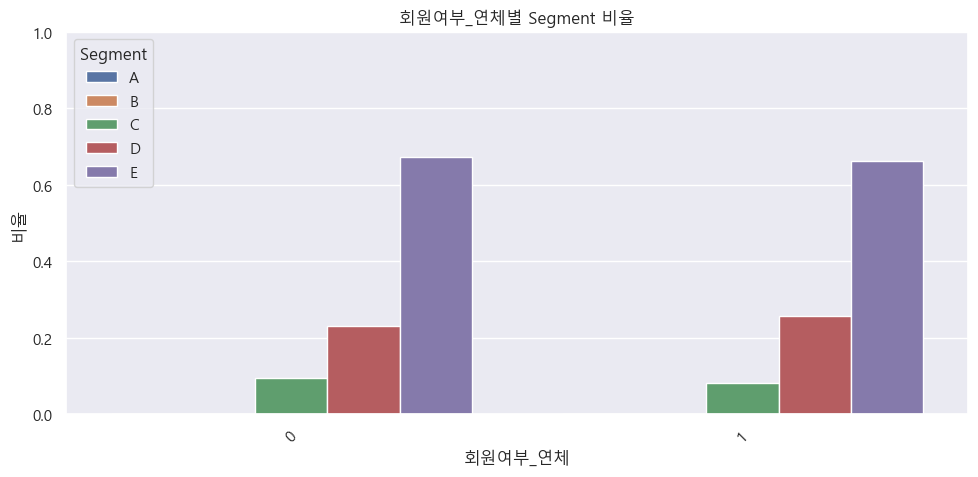

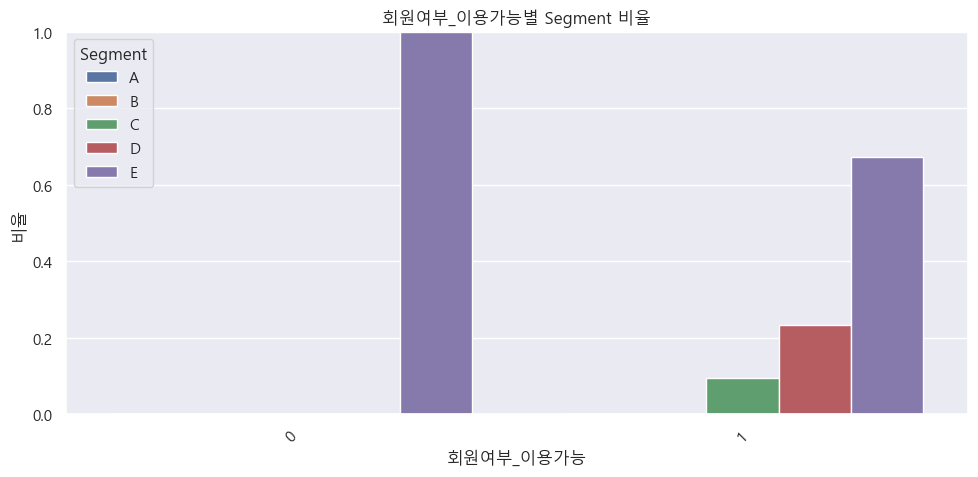

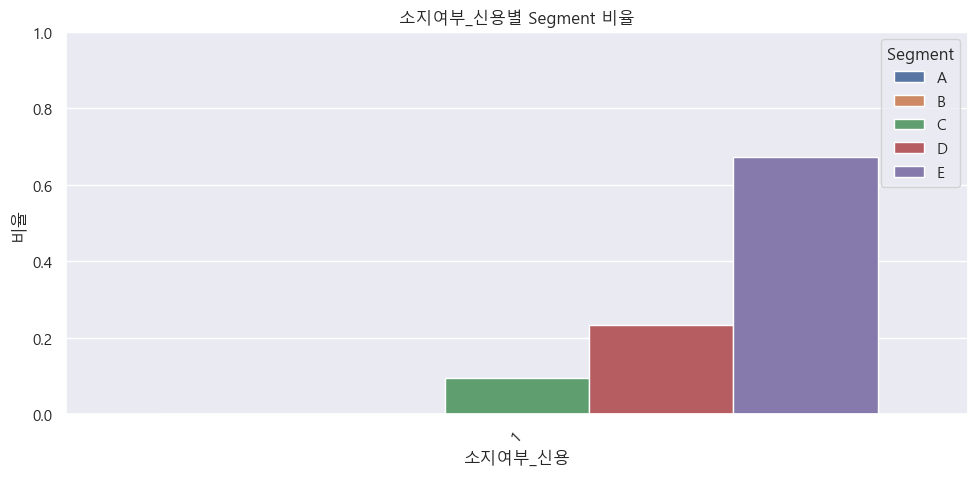

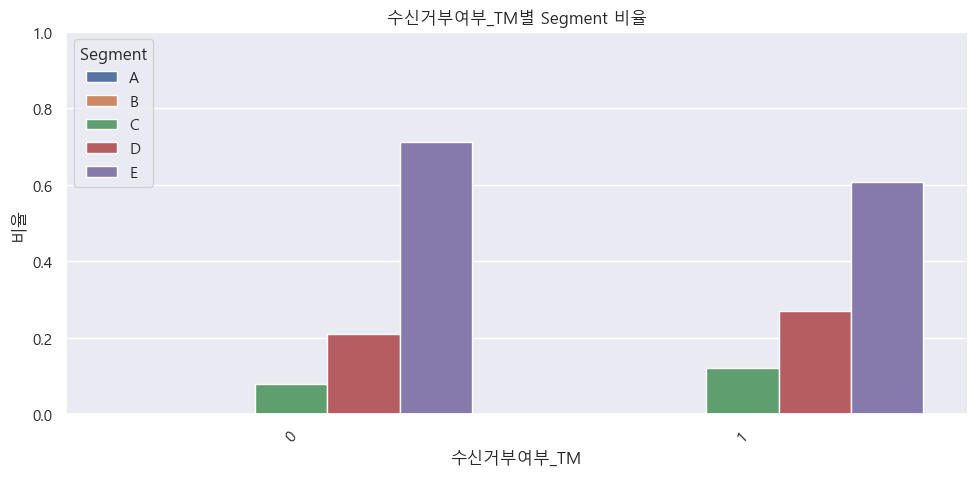

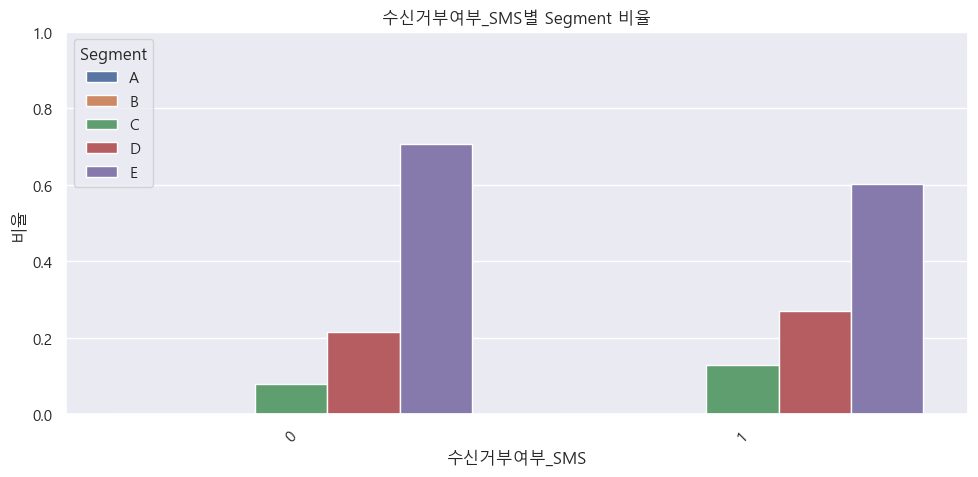

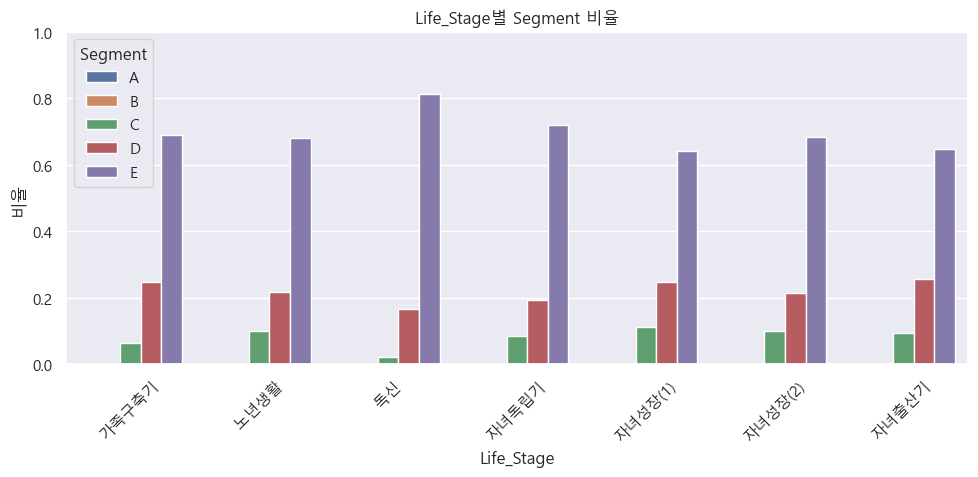

In [99]:
# Segment ÏàúÏÑú Í≥†Ï†ï
df_all['Segment'] = pd.Categorical(df_all['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

categorical_cols = [
    'ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Ïó∞Î†π', 'Í∞ÄÏûÖÌÜµÏã†ÌöåÏÇ¨ÏΩîÎìú', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö', 'ÏßÅÏû•ÏãúÎèÑÎ™Ö',
    'ÎßàÏºÄÌåÖÎèôÏùòÏó¨Î∂Ä', 'ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥', 'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•', 'ÏÜåÏßÄÏó¨Î∂Ä_Ïã†Ïö©',
    'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_SMS', 'Life_Stage'
]

for col in categorical_cols:
    # ÎπÑÏú® Í≥ÑÏÇ∞
    prop_df = (
        df_all.groupby(col)['Segment']
        .value_counts(normalize=True)
        .rename('ÎπÑÏú®')
        .reset_index()
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(data=prop_df, x=col, y='ÎπÑÏú®', hue='Segment')
    plt.title(f"{col}Î≥Ñ Segment ÎπÑÏú®")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


###  üìä Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÌÜµÌï¥ Ïú†ÏùòÎØ∏Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂úÏùÄ Ïñ¥Î†§Ïö¥ Í≤ÉÏúºÎ°ú Ï∂îÏ†ï

- ÎπÑÏä∑Ìïú ÎπÑÏú®Î°ú Íµ¨ÏÑ±
- ÎùºÏù¥ÌîÑ Ïä§ÌÖåÏù¥ÏßÄÏóêÏÑú ÎèÖÏã†Ïùò Í≤ΩÏö∞ CÏôÄ EÏùò ÎπÑÏú® Ï∞®Í∞Ä Í∞ÄÏû• ÌÅ¨Í≤å ÎÇòÌÉÄÎÇ®

In [102]:
corr = df_all.select_dtypes(include='number').corr()
high_corr = np.where(abs(corr) > 0.9)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print("ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ 0.9 Ïù¥ÏÉÅ Î≥ÄÏàòÏåç:", high_corr_pairs)

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ 0.9 Ïù¥ÏÉÅ Î≥ÄÏàòÏåç: [('ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïú†Ìö®_Ïã†Ïö©', 'ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïù¥Ïö©Í∞ÄÎä•_Ïã†Ïö©'), ('ÏûÖÌöåÏùºÏûê_Ïã†Ïö©', 'ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©'), ('ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_DM', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_Î©îÏùº'), ('Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨'), ('Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©'), ('Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±'), ('Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±'), ('Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©_Í∞ÄÏ°±'), ('Ïú†Ìö®Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨'), ('Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©'), ('Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±'), ('Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©_Í∞ÄÏ°±'), ('Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©_Í∞ÄÏ°±'), ('Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©'), ('Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', '_1Ïàú

###  üìä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Í≤ÉÏùÄ ÌïòÎÇòÎ°ú ÌÜµÌï© Î∞è ÎåÄÌëú ÌïòÎÇòÎßå ÎÇ®Í∏∞Í≥† Ï†úÍ±∞Í∞Ä ÌïÑÏöî

<Axes: >

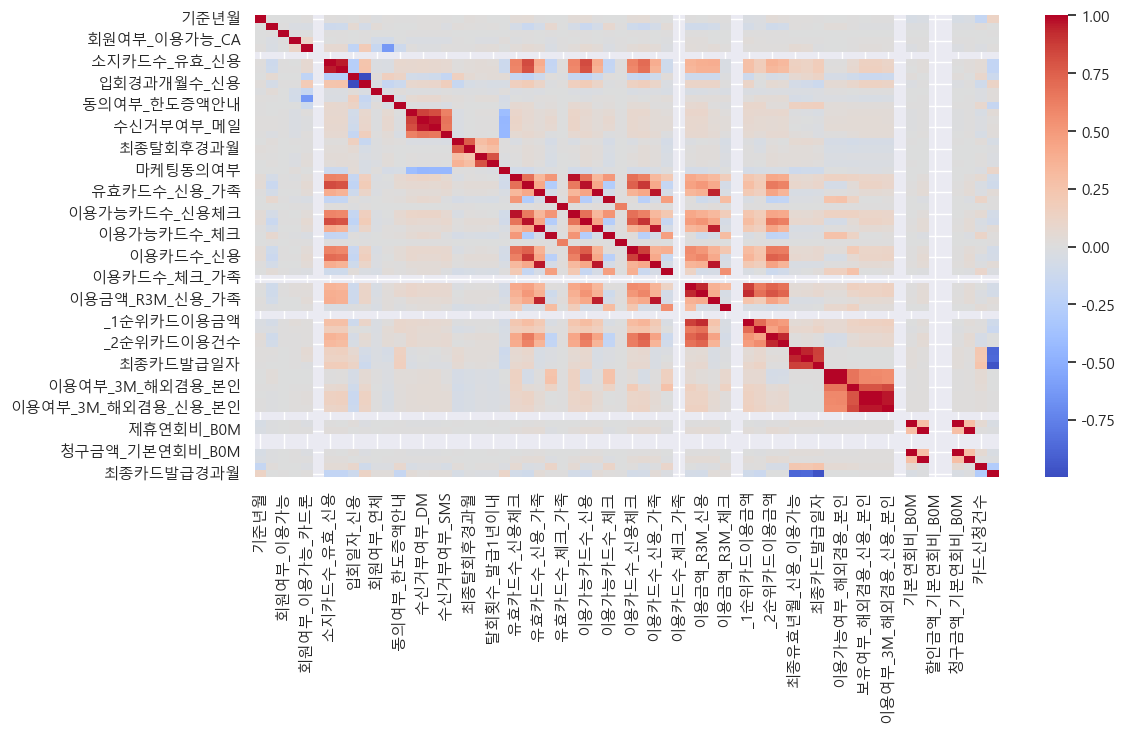

In [106]:
sns.heatmap(corr, cmap='coolwarm')

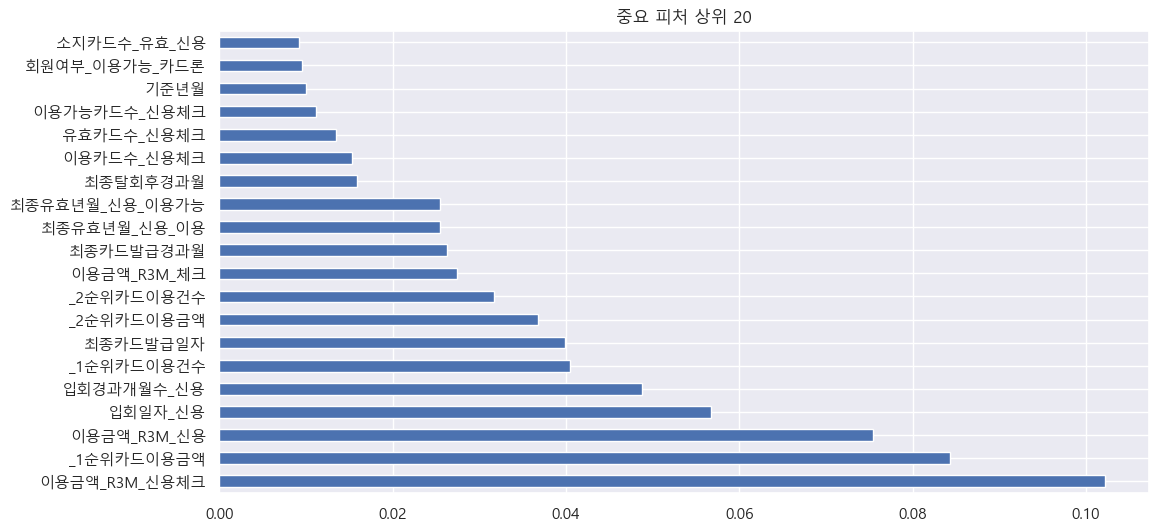

In [111]:
X = df_model.drop(columns=['Segment', 'ID']) # ‚úÖ ÏòàÏ∏°Ïóê Î∂àÌïÑÏöîÌïòÍ±∞ÎÇò ÌÉÄÍ≤üÏù∏ Ïó¥ Ï†úÍ±∞
y = LabelEncoder().fit_transform(df_model['Segment']) # ‚úÖ Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò

X = pd.get_dummies(X)  # Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî©
model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')
plt.title("Ï§ëÏöî ÌîºÏ≤ò ÏÉÅÏúÑ 20")
plt.show()

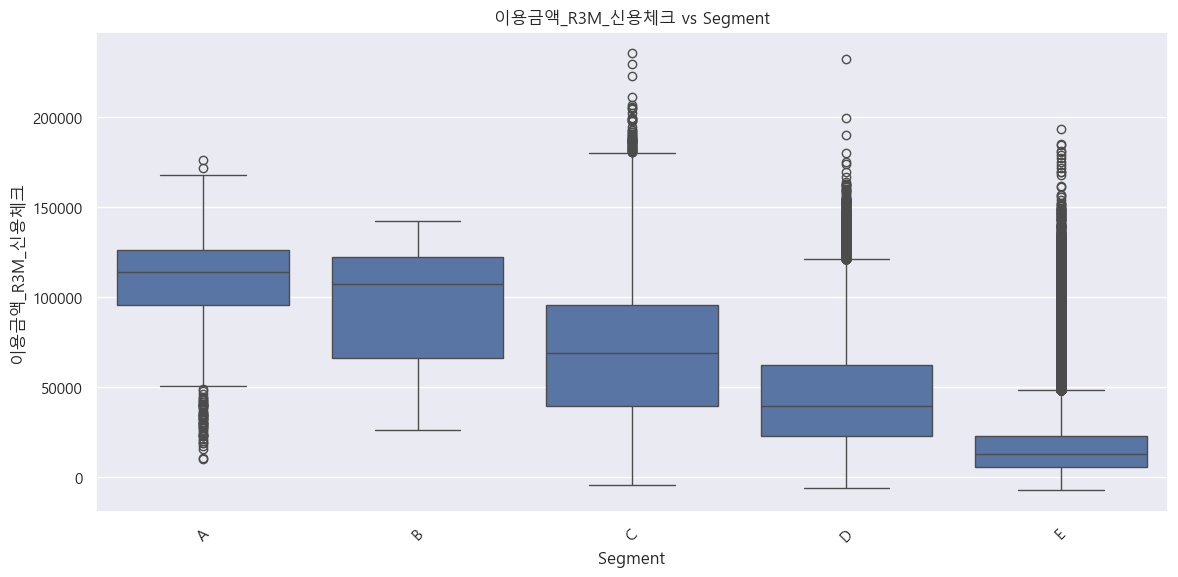

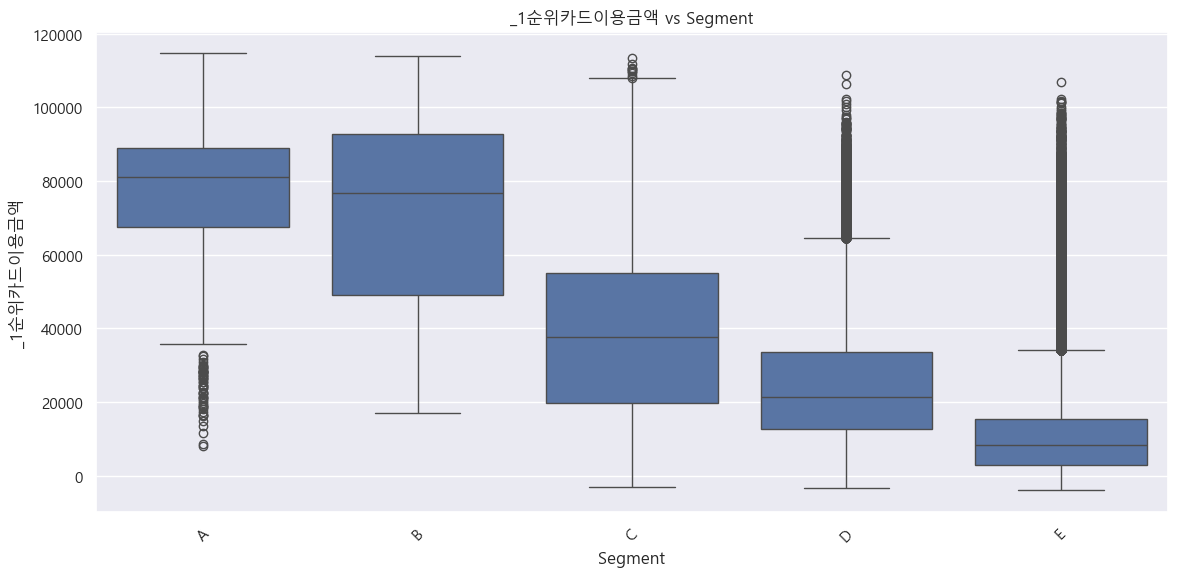

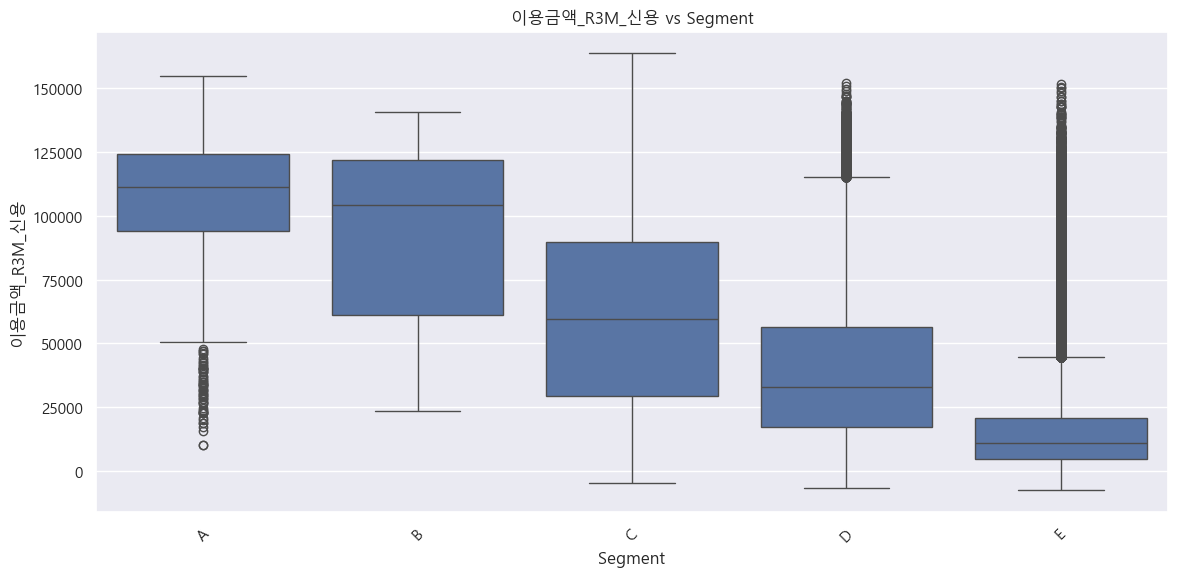

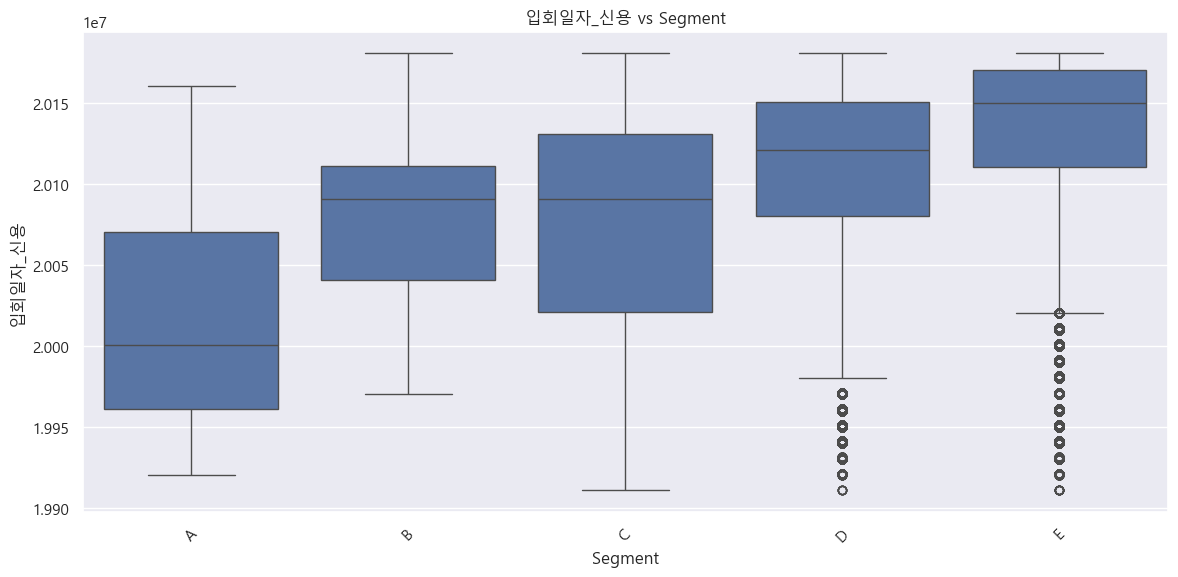

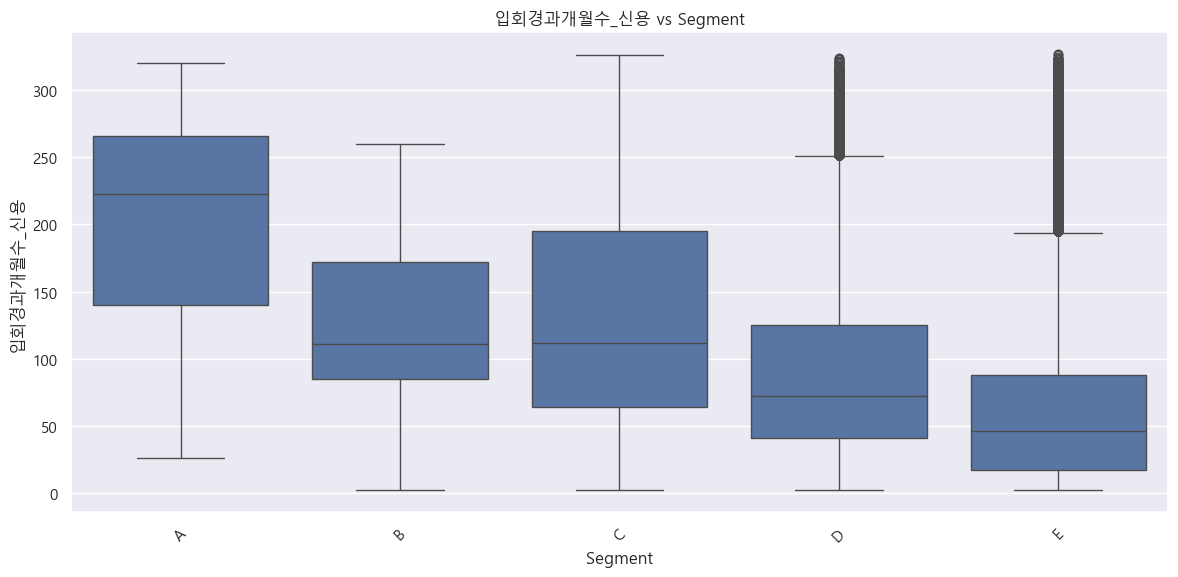

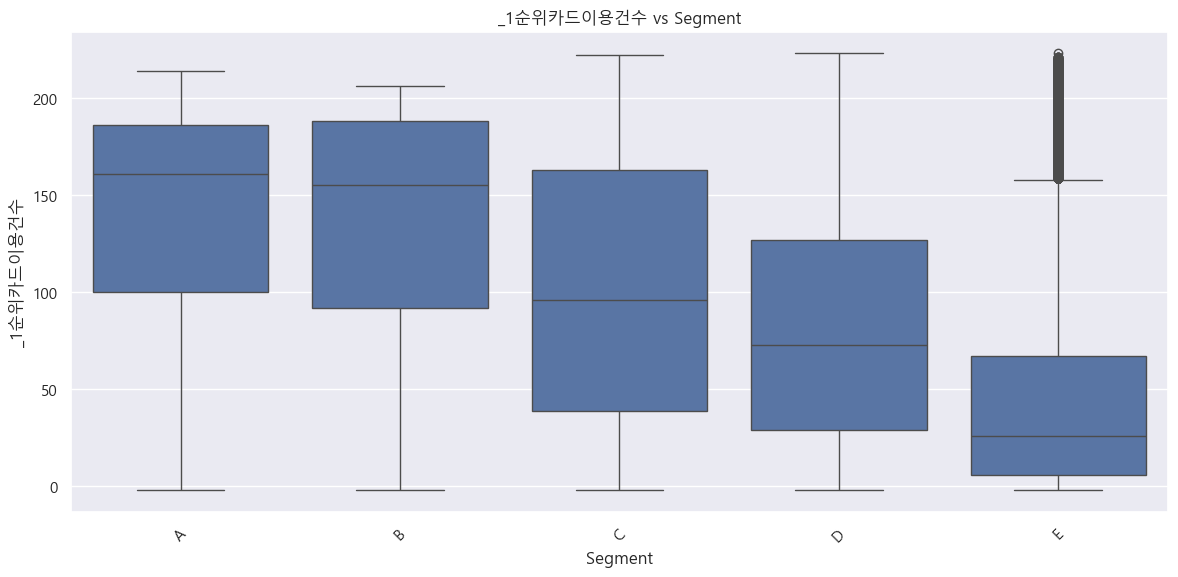

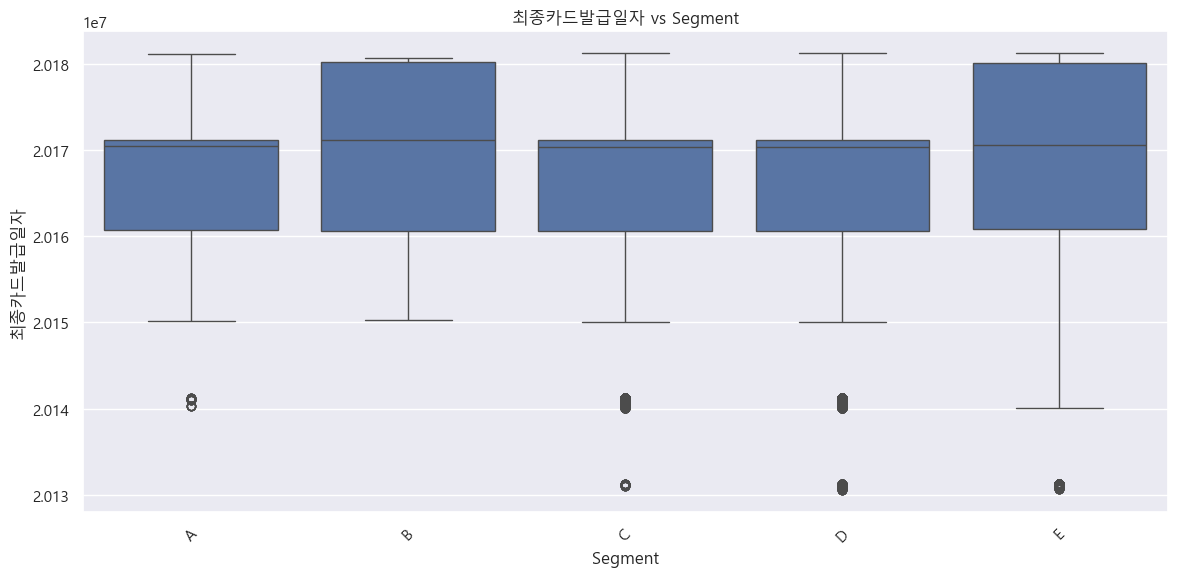

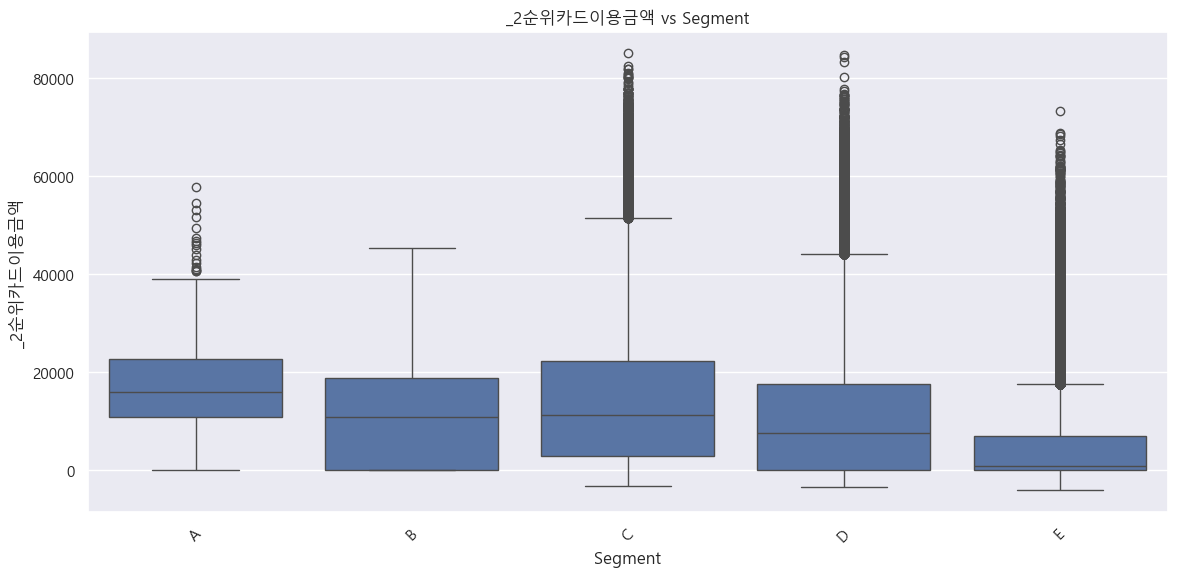

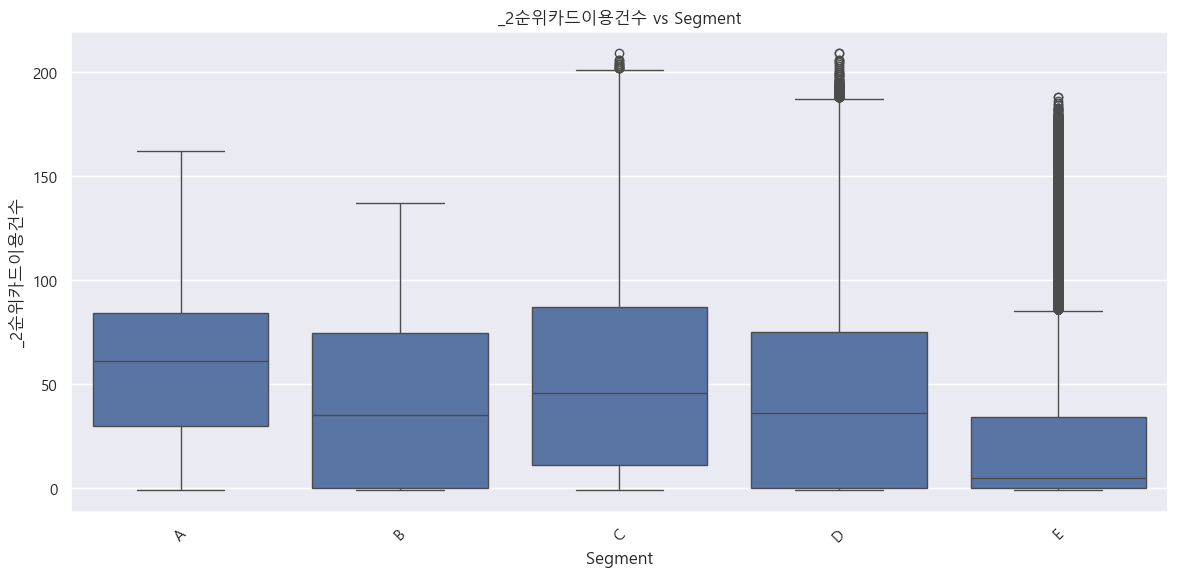

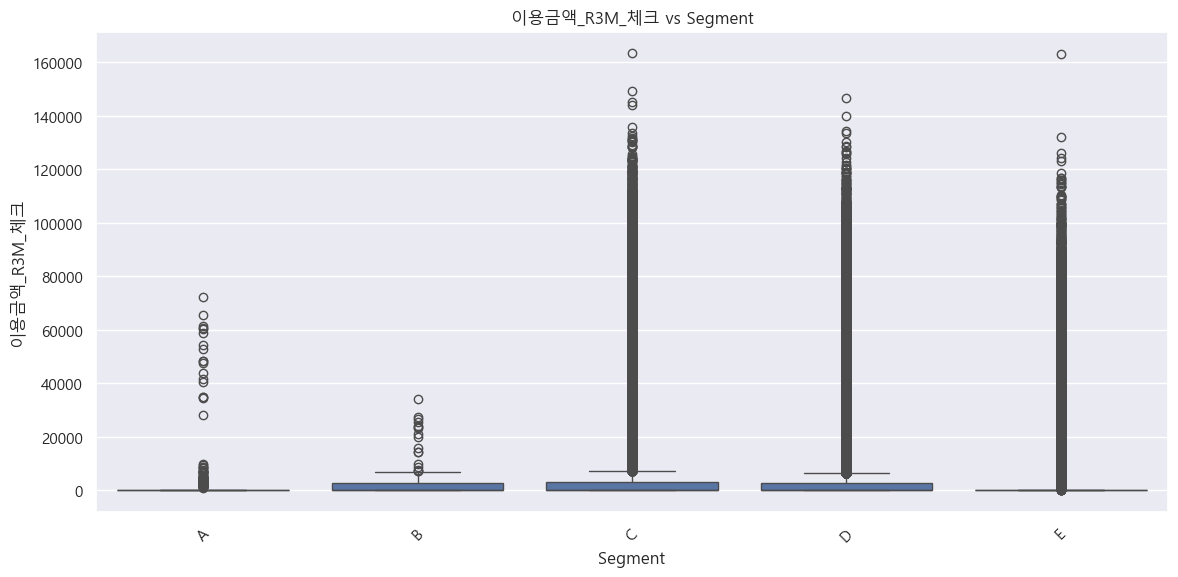

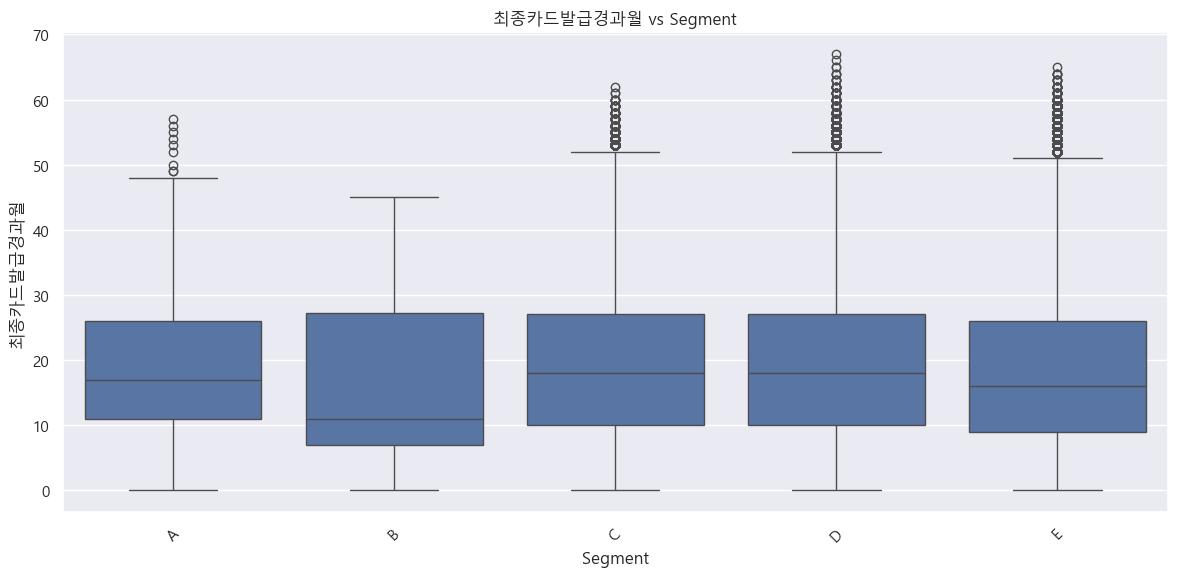

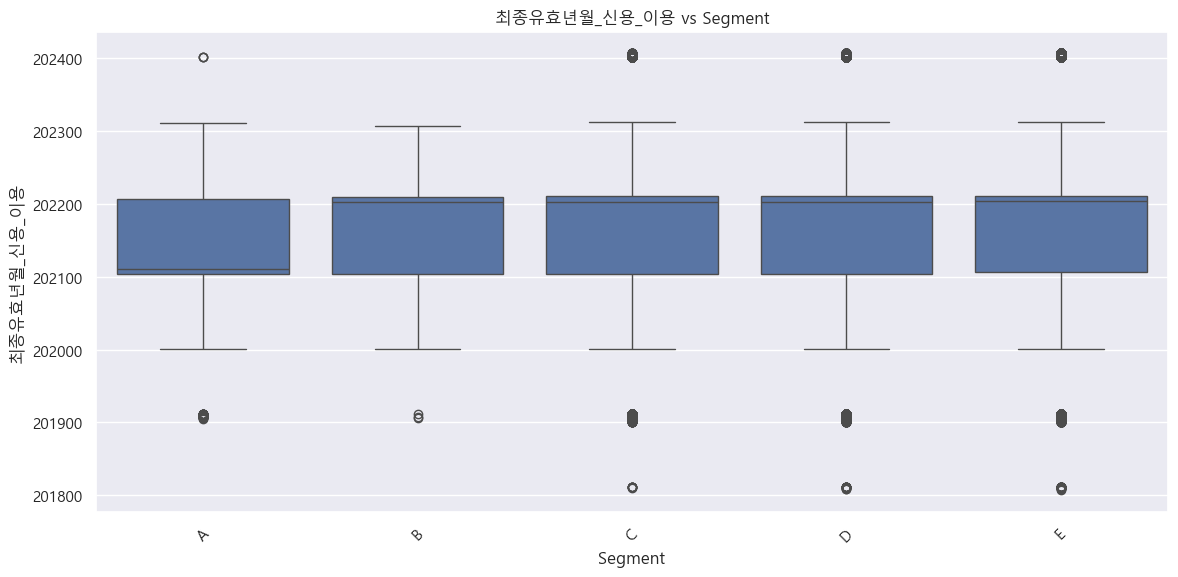

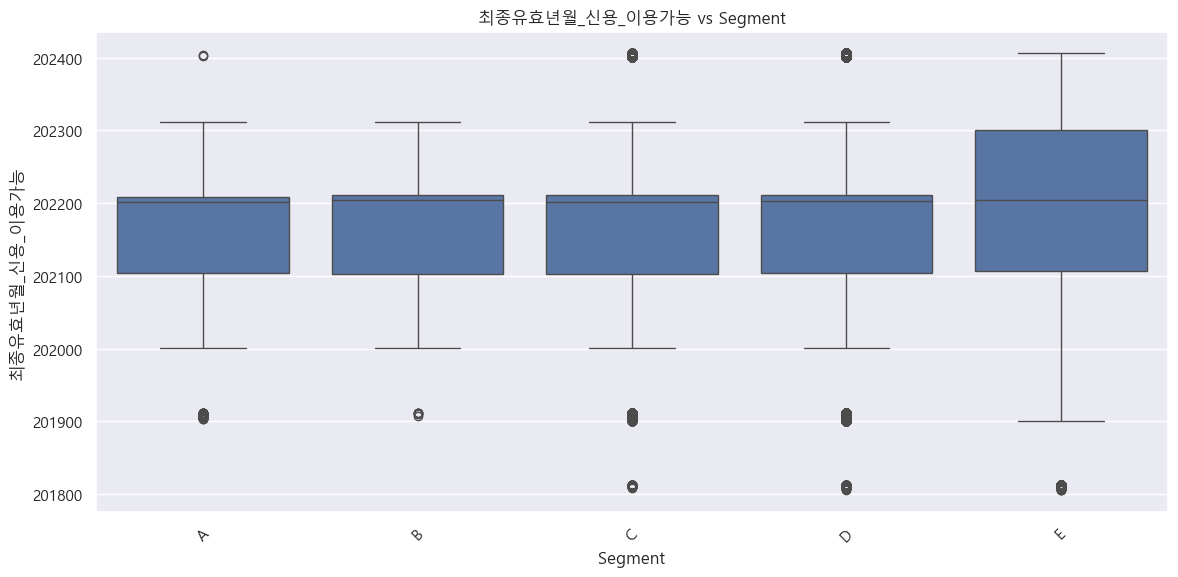

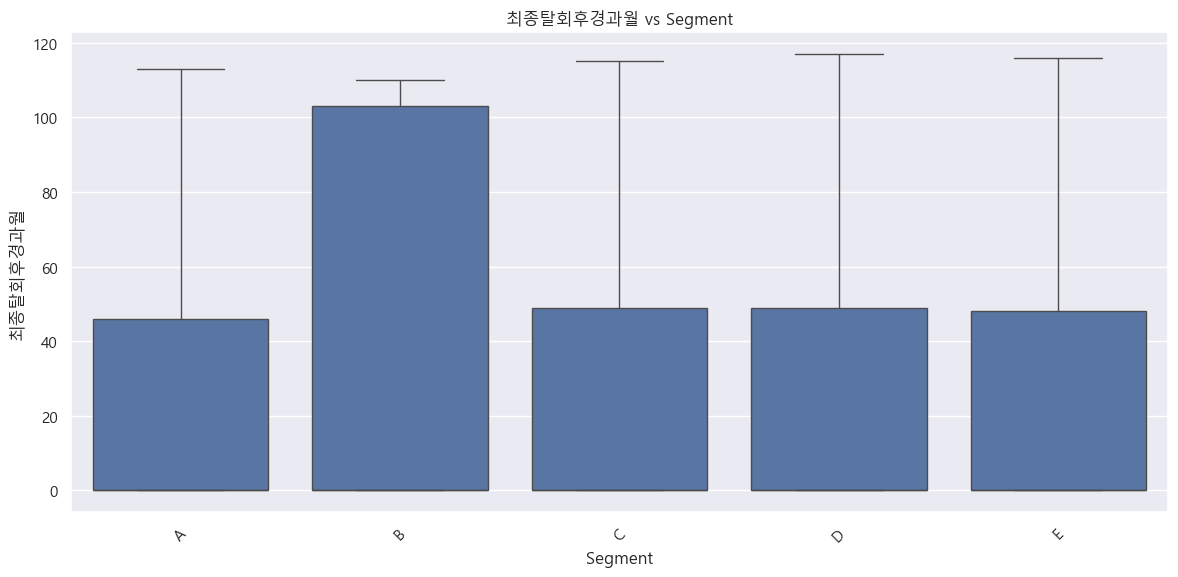

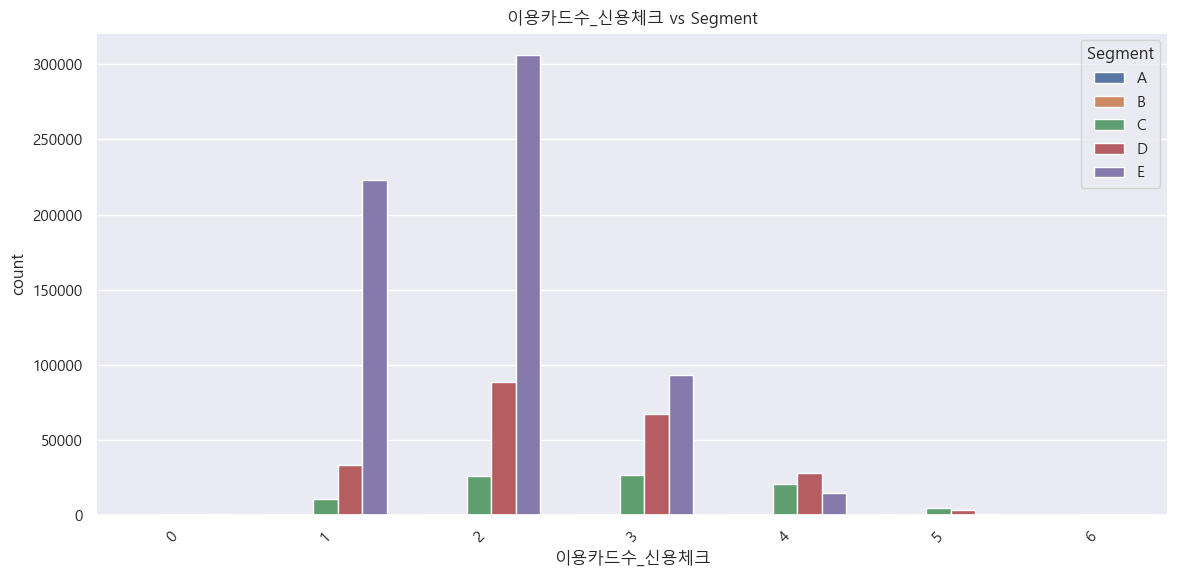

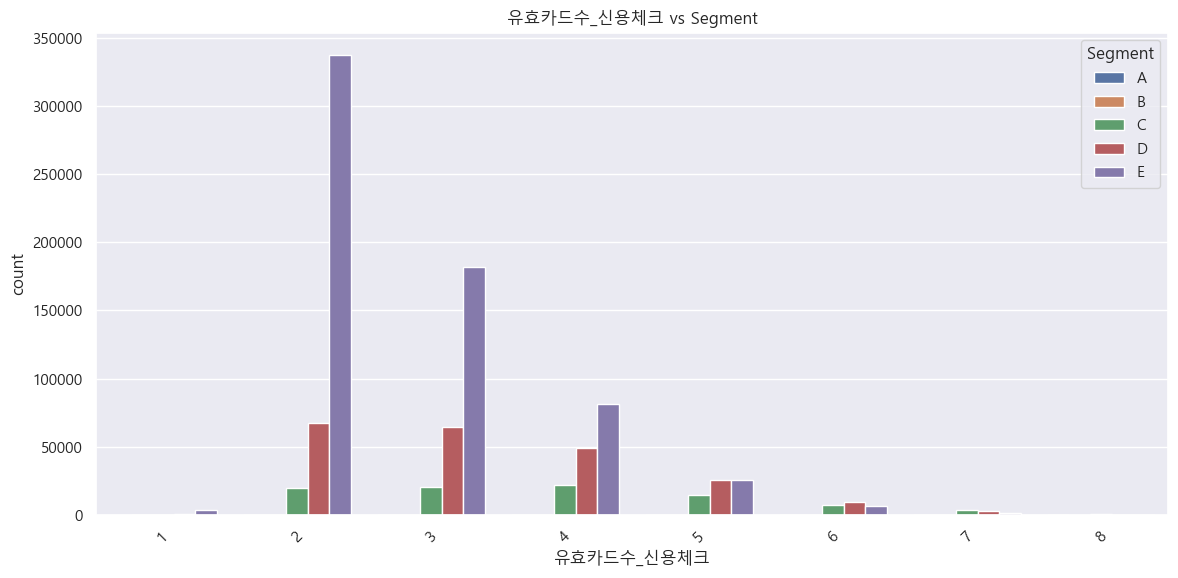

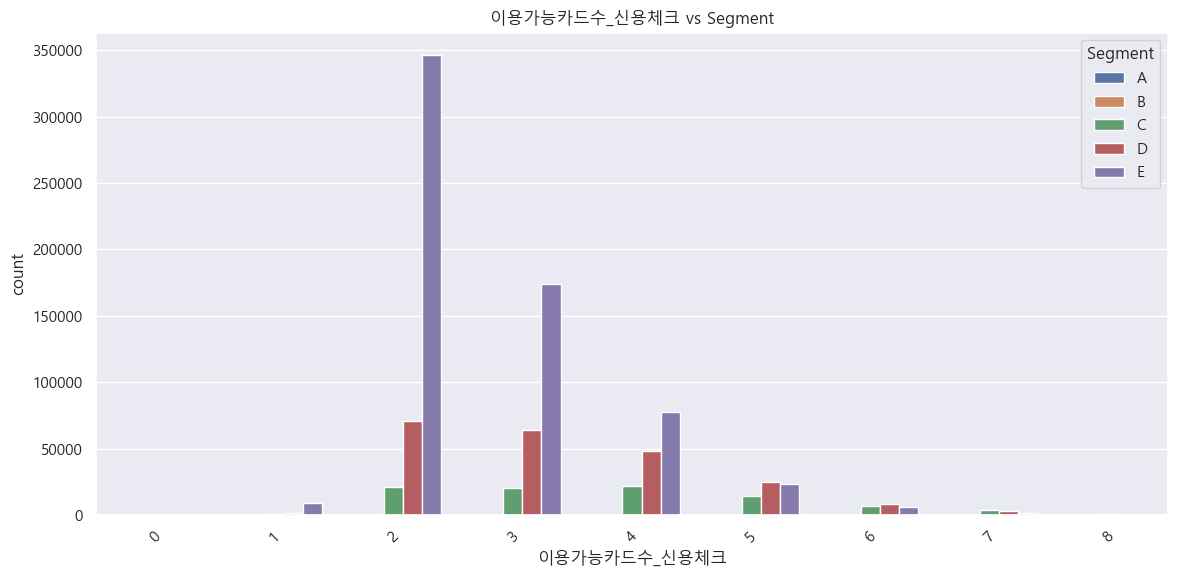

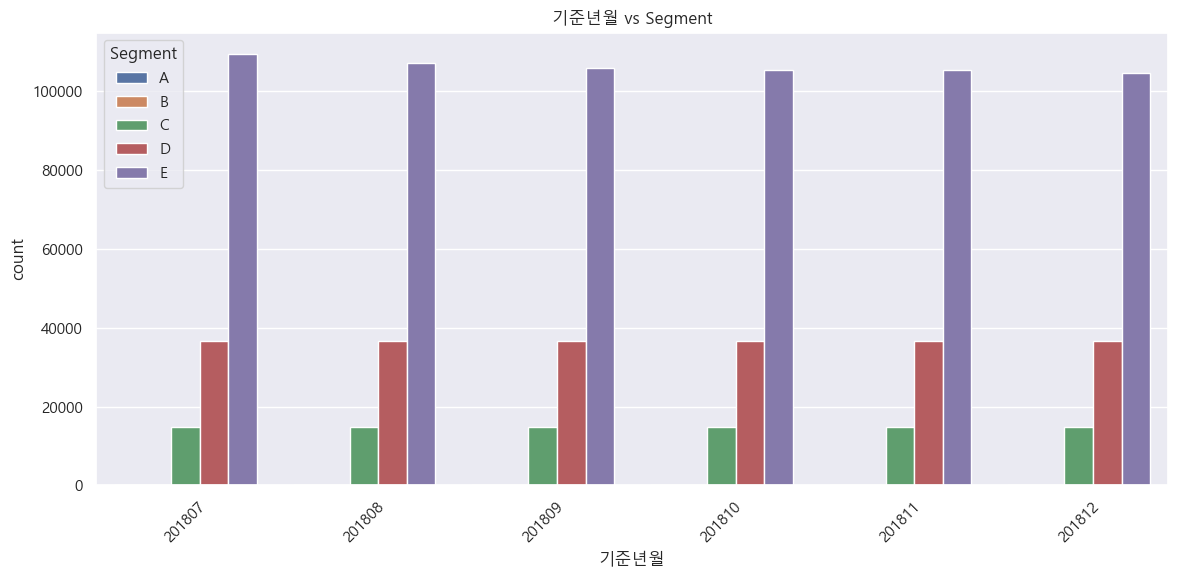

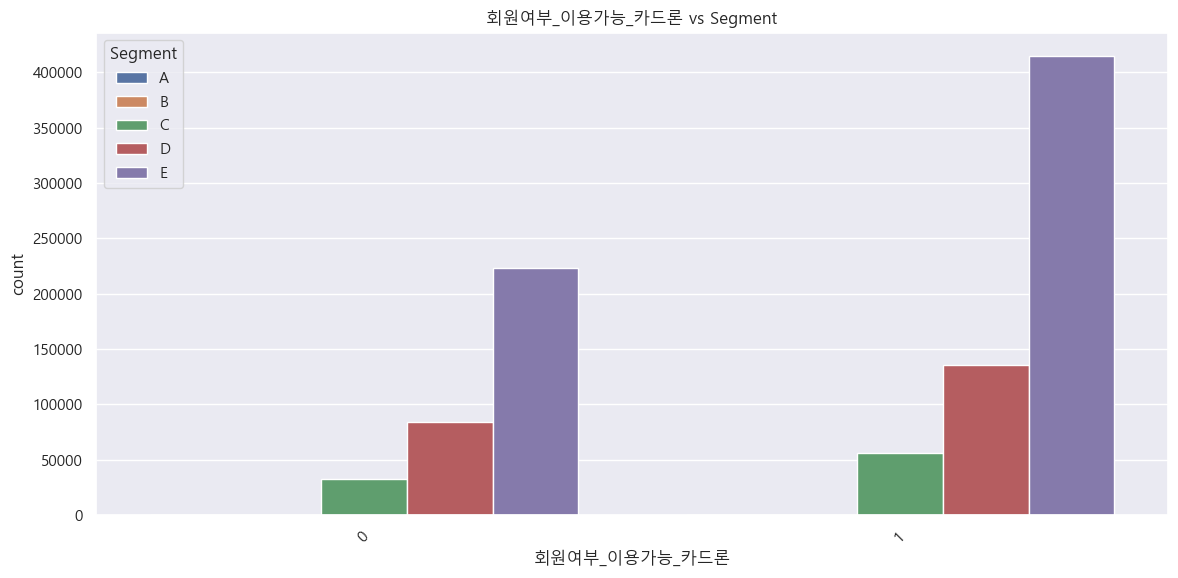

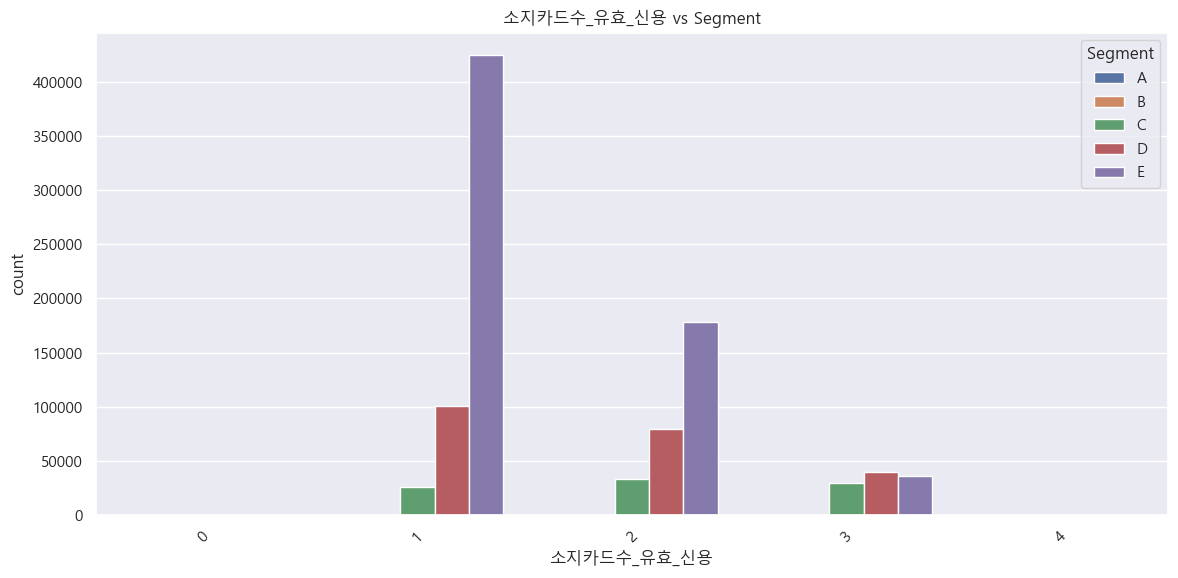

In [123]:
top_cols = importances.nlargest(20).index.tolist()

for col in top_cols:
    if df_all[col].nunique() < 15:
        sns.countplot(data=df_all, x=col, hue='Segment')
    else:
        sns.boxplot(data=df_all, x='Segment', y=col)
    plt.title(f"{col} vs Segment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###  üìä ÌîºÏ≥ê Ï†ïÎ¶¨ ÏöîÏïΩ
- ÏûÖÌöå Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ ÎÜíÏùå ‚Üí Ïú†ÏßÄ

- Ïó∞Ï≤¥ Ïó¨Î∂ÄÎäî ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùå ‚Üí Ï†úÍ±∞ Í∞ÄÎä•

- Î≤îÏ£ºÌòï Î≥ÄÏàò Ï†ÑÎ∞ò ÏòÅÌñ• ÏïΩÌï® ‚Üí ÎåÄÎ∂ÄÎ∂Ñ Ï†úÍ±∞

- ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ ÌîºÏ≤òÎäî ÌïòÎÇòÎßå Ïú†ÏßÄ

- Ï§ëÏöîÎèÑ Í∏∞Î∞ò Top 20 ÌîºÏ≤ò Ïö∞ÏÑ† Î∞òÏòÅ

In [131]:
# Ï§ëÏöî ÌîºÏ≤ò ÏÉÅÏúÑ 20Í∞ú
top_cols = [
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©',
    'ÏûÖÌöåÏùºÏûê_Ïã†Ïö©', 'ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò',
    'ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÏùºÏûê', '_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', '_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò',
    'Ïù¥Ïö©Í∏àÏï°_R3M_Ï≤¥ÌÅ¨', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÍ≤ΩÍ≥ºÏõî', 'ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©',
    'ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©Í∞ÄÎä•', 'ÏµúÏ¢ÖÌÉàÌöåÌõÑÍ≤ΩÍ≥ºÏõî', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨',
    'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Í∏∞Ï§ÄÎÖÑÏõî',
    'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_Ïπ¥ÎìúÎ°†', 'ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïú†Ìö®_Ïã†Ïö©'
]

# Î∂àÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®Îêú Î≥ÄÏàò
drop_cols = [
    'ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥',  # Ïó∞Ï≤¥Îäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ ÏóÜÏùå
    'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_SMS',  # Segment Î∂ÑÌè¨ Ï∞®Ïù¥ ÎØ∏ÎØ∏
    'ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Í∞ÄÏûÖÌÜµÏã†ÌöåÏÇ¨ÏΩîÎìú', 'Í±∞Ï£ºÏãúÎèÑÎ™Ö', 'ÏßÅÏû•ÏãúÎèÑÎ™Ö',  # ÏòÅÌñ• ÎØ∏ÎØ∏
    'ÎßàÏºÄÌåÖÎèôÏùòÏó¨Î∂Ä',  # ÏòÅÌñ• ÎØ∏ÎØ∏
    'ID'  # Í≥†Ïú†Í∞í, ÏòàÏ∏°Ïóê Î∂àÌïÑÏöî
    '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°' # Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Í≥º ÎπÑÏä∑Ìïú ÏñëÏÉÅ
]

# ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î™©Î°ù (Segment Ìè¨Ìï®)
selected_cols = top_cols + ['Segment']

# ÏÑ†ÌÉùÎêú Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
df_selected = df_all[selected_cols]

# ÌïÑÏöî ÏóÜÎäî ÌîºÏ≤ò Ï†úÍ±∞
df_selected = df_selected.drop(columns=[col for col in drop_cols if col in df_selected.columns])

# Í≤∞Í≥º ÌôïÏù∏
print("ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú Ïª¨Îüº Ïàò:", len(df_selected.columns))
print("Ïª¨Îüº Î™©Î°ù:", df_selected.columns.tolist())


ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú Ïª¨Îüº Ïàò: 21
Ïª¨Îüº Î™©Î°ù: ['Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©Ï≤¥ÌÅ¨', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ïã†Ïö©', 'ÏûÖÌöåÏùºÏûê_Ïã†Ïö©', 'ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©', '_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÏùºÏûê', '_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°', '_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò', 'Ïù¥Ïö©Í∏àÏï°_R3M_Ï≤¥ÌÅ¨', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ∞úÍ∏âÍ≤ΩÍ≥ºÏõî', 'ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©', 'ÏµúÏ¢ÖÏú†Ìö®ÎÖÑÏõî_Ïã†Ïö©_Ïù¥Ïö©Í∞ÄÎä•', 'ÏµúÏ¢ÖÌÉàÌöåÌõÑÍ≤ΩÍ≥ºÏõî', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Í∏∞Ï§ÄÎÖÑÏõî', 'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_Ïπ¥ÎìúÎ°†', 'ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïú†Ìö®_Ïã†Ïö©', 'Segment']
